In [1]:
# Lab 4.3 Compare Regressions

In [2]:
# It will be continued below lab 4.2

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [370]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [5]:
%matplotlib inline

In [6]:
pd.set_option('display.max_columns',None)

# Load the data and general info

In [7]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [8]:
customer_df.head(8)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize


In [9]:
customer_df.shape

(9134, 24)

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Rename Columns

In [12]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ','_'),list(customer_df.columns)))

In [13]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
list(customer_df.columns)

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [15]:
customer_df.rename(columns={'customer_lifetime_value':'clv',
                            'effective_to_date': 'e2d',
                            'employmentstatus':'e_status',
                            'location_code': 'loc_code',
                            'marital_status': 'm_status',
                            'monthly_premium_auto':'mpa',
                            'months_since_last_claim': 'mslc',
                            'months_since_policy_inception': 'mspi',
                            'number_of_open_complaints': 'noc',
                            'number_of_policies': 'n_policies',
                            'renew_offer_type': 'rot',
                            'sales_channel':'channel',
                            'total_claim_amount': 'tca'},
                  inplace=True)

In [16]:
customer_df

,customer,state,clv,response,coverage,education,e2d,e_status,gender,income,loc_code,m_status,mpa,mslc,mspi,noc,n_policies,policy_type,policy,rot,channel,tca,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Change e2d to datetime format

In [17]:
customer_df.e2d = pd.to_datetime(customer_df.e2d)

In [18]:
customer_df.dtypes

customer                 object
state                    object
clv                     float64
response                 object
coverage                 object
education                object
e2d              datetime64[ns]
e_status                 object
gender                   object
income                    int64
loc_code                 object
m_status                 object
mpa                       int64
mslc                      int64
mspi                      int64
noc                       int64
n_policies                int64
policy_type              object
policy                   object
rot                      object
channel                  object
tca                     float64
vehicle_class            object
vehicle_size             object
dtype: object

# continuous discrete function

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [19]:
# save and drop customer_id
customer_id = customer_df.customer
customer_id

0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: customer, Length: 9134, dtype: object

In [20]:
customer_df.drop(columns='customer',inplace=True)

In [21]:
for c in customer_df.columns:
    print(customer_df[c].nunique(), c)

5 state
8041 clv
2 response
3 coverage
5 education
59 e2d
5 e_status
2 gender
5694 income
3 loc_code
3 m_status
202 mpa
36 mslc
100 mspi
6 noc
9 n_policies
3 policy_type
9 policy
4 rot
4 channel
5106 tca
6 vehicle_class
3 vehicle_size


In [22]:
def continuous_discrete(df,n=10):
    cont = []
    disc = []
    for c in df.columns:
        if df[c].nunique() >= n:
            cont.append(c)
        else:
            disc.append(c)
    
    continuous_df = df[cont]
    discret_df = df[disc]
    
    return continuous_df, discret_df
    

In [23]:
continuous_df, discrete_df = continuous_discrete(customer_df)

In [24]:
continuous_df.head(10)

,clv,e2d,income,mpa,mslc,mspi,tca
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879
5,8256.297800,2011-01-25,62902,69,14,94,159.383042
6,5380.898636,2011-02-24,55350,67,0,13,321.600000
7,7216.100311,2011-01-18,0,101,0,68,363.029680
8,24127.504020,2011-01-26,14072,71,13,3,511.200000
9,7388.178085,2011-02-17,28812,93,17,7,425.527834


In [25]:
discrete_df.head(10)

,state,response,coverage,education,e_status,gender,loc_code,m_status,noc,n_policies,policy_type,policy,rot,channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,0,9,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,0,4,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,0,2,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,0,8,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [26]:
# Effective to date is a datetime variable

In [27]:
effective_date = continuous_df.e2d

In [28]:
continuous_df.drop(columns='e2d',inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Plot a correlation matrix and comment

In [29]:
continuous_df.corr()

,clv,income,mpa,mslc,mspi,tca
clv,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
mpa,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
mslc,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
mspi,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
tca,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


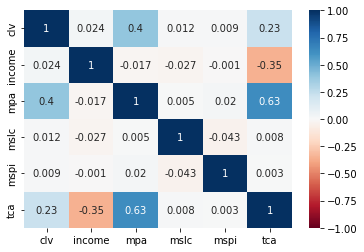

In [30]:
sns.heatmap(round(continuous_df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
plt.show()

Monthly Premium Auto (mpa) is the highest correlated variable.  
After comes income with inverse correlation.  
Also Customer Lifetime Value has a low correlation and multicollinearity with mpa

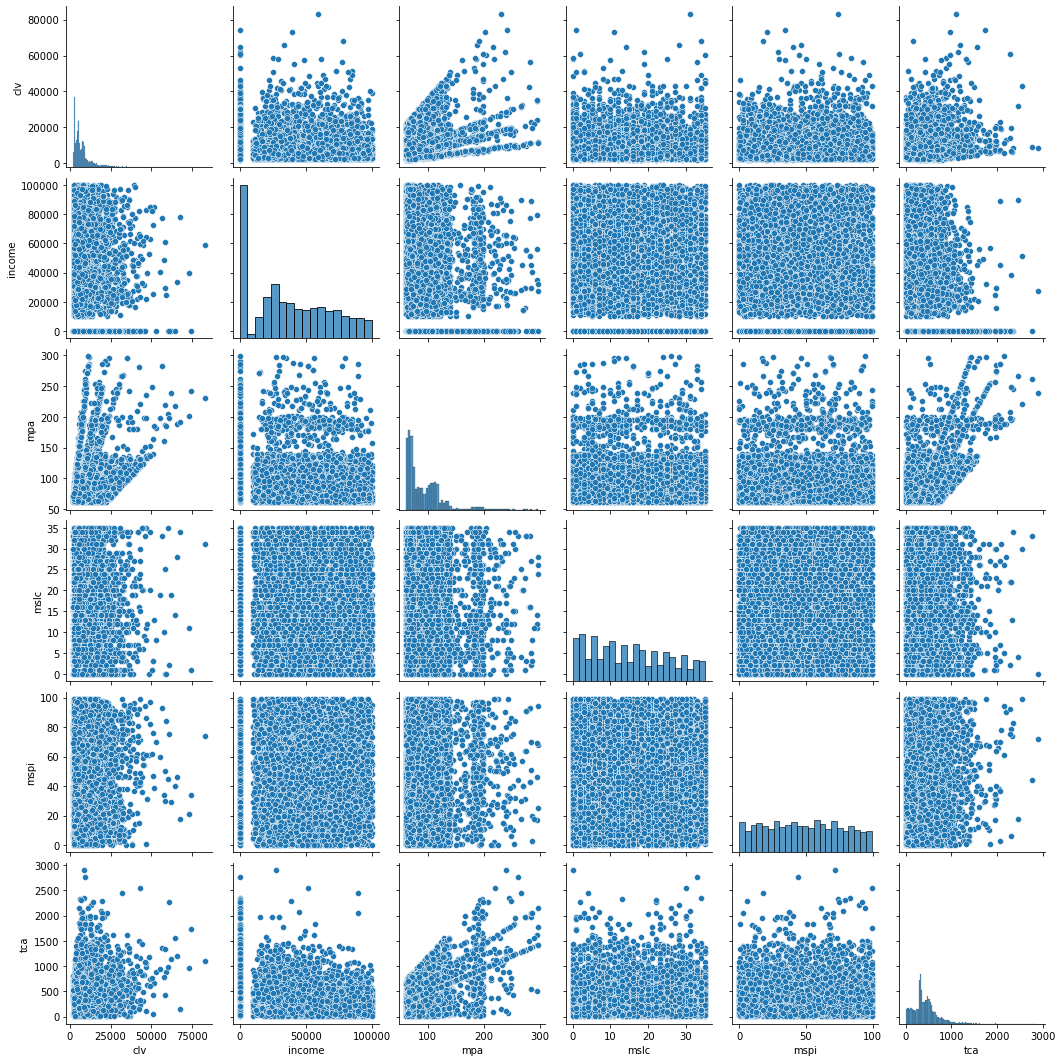

In [31]:
sns.pairplot(continuous_df)
plt.show()

## Define a function

In [32]:
def corrPlots(df):
    display(df.corr())
    sns.heatmap(round(df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
    plt.show()
    sns.pairplot(df)
    plt.show()

# Functions to plot discrete and continuous

## plot discrete

In [33]:
def plotDiscrete(df):
    for c in df.columns:
        ax = sns.countplot(x=c,data=df)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        # annotate
        ax.bar_label(ax.containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
        ax.margins(y=0.1)
        
        plt.show()
        

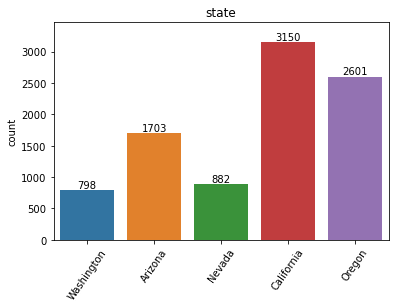

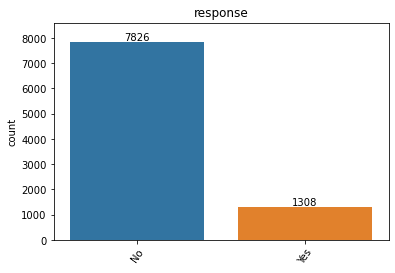

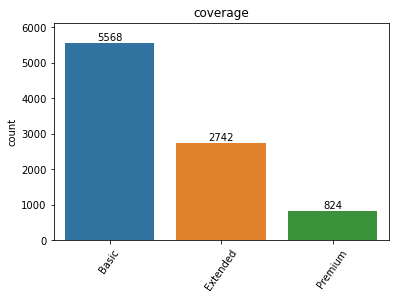

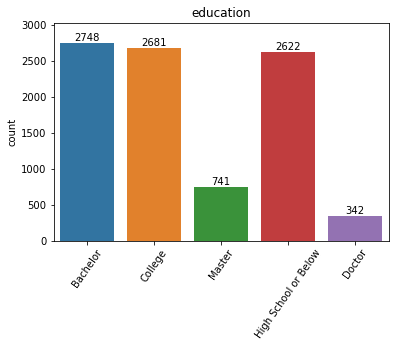

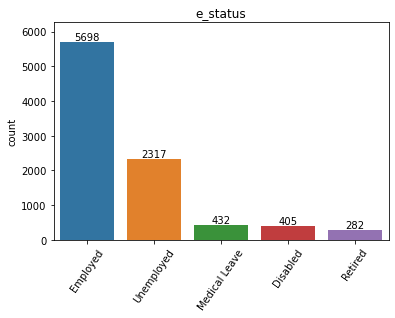

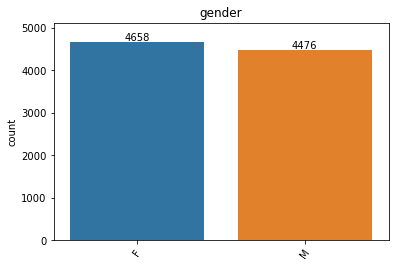

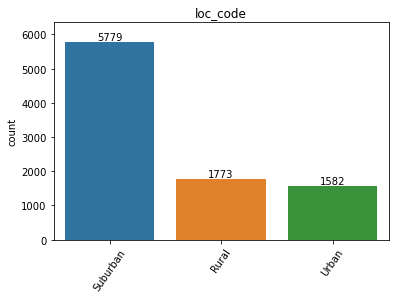

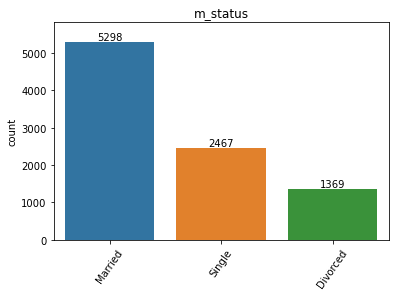

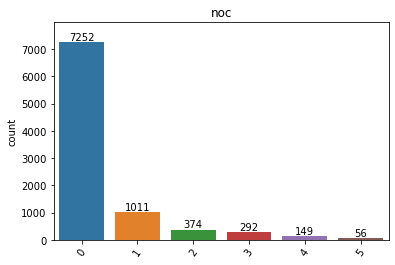

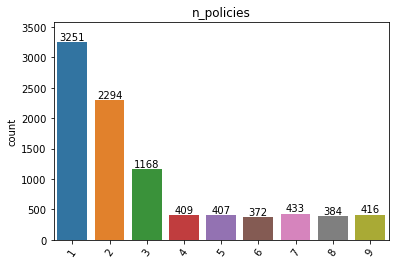

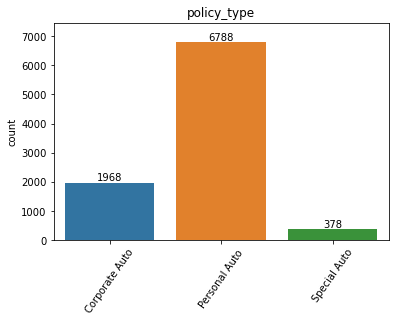

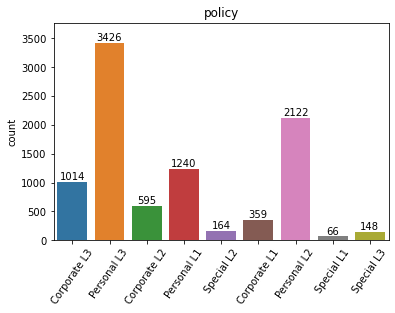

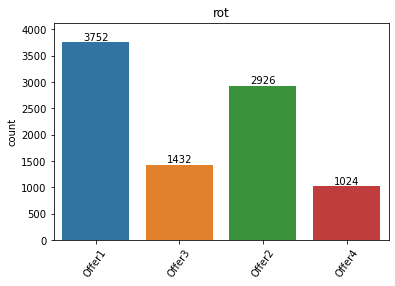

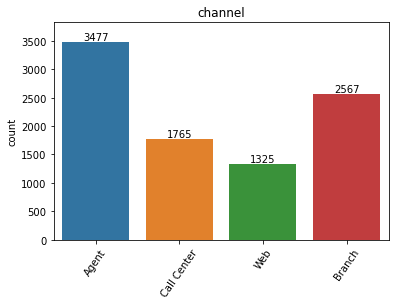

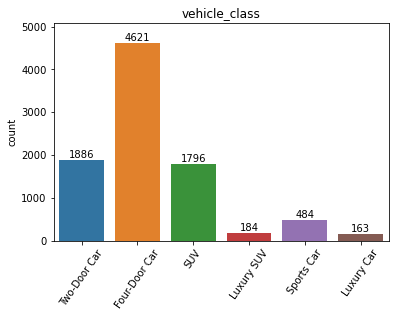

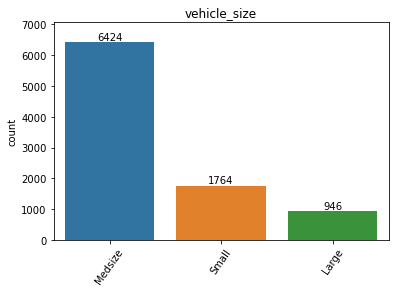

In [34]:
plotDiscrete(discrete_df)

Number of policies and number of complaints are numerical. They might work as ordinal categories as well.

## Plot continuous

In [35]:
def plotContinuous(df):
    for c in df.columns:
        sns.histplot(x=c,data=df, kde=True)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        plt.show()

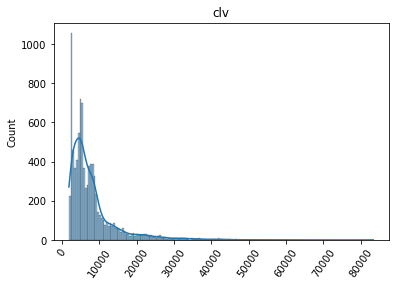

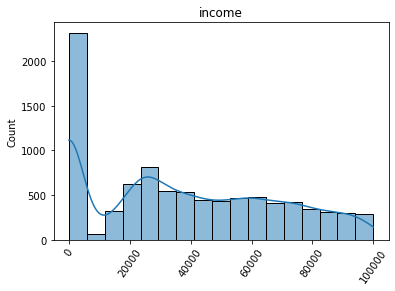

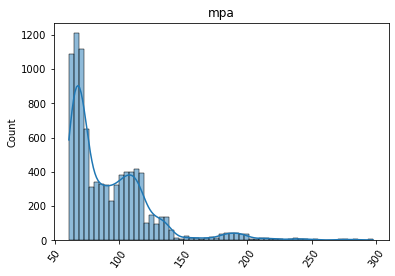

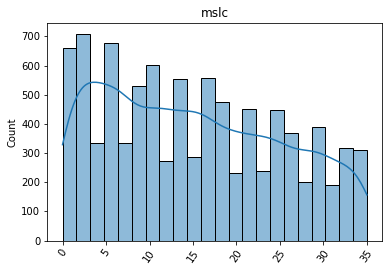

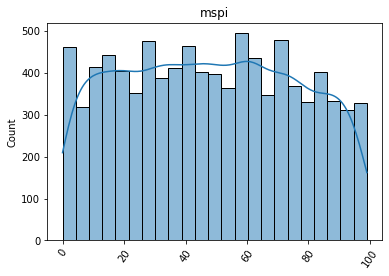

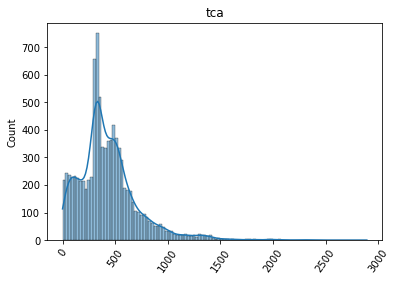

In [36]:
plotContinuous(continuous_df)

Effective to date is datetime.  


In [37]:
#effective_date = continuous_df.e2d

In [38]:
#continuous_df.drop(columns='e2d',inplace=True)

# Comment the plots

I just see single count plots of every categorical variable. I have not got any notion of the relevance of those categorical variables.  
Most of them undergo class imbalance. Except gender.   
  
In the continuous variables I dropped effective to date because is datetime.  
mspi, mslc and income show a relatively uniform distribution.  
tca, mpa and clv are highly skewed.
  
There's a strangely high amount of 0 in income.  
  
Let's get the the skewness

In [39]:
continuous_df.skew()

clv       3.032280
income    0.286887
mpa       2.123546
mslc      0.278586
mspi      0.040165
tca       1.714966
dtype: float64

In [40]:
skewed = continuous_df.skew()[continuous_df.skew()>2]
skewed

clv    3.032280
mpa    2.123546
dtype: float64

# Outliers in continuous

In [41]:
def plotOutliers(df):
    for c in df.columns:
        sns.set_theme(style="whitegrid")
        ax = sns.boxplot(x=c, data=df, orient='h')
        plt.title(c)
        plt.xlabel(None)
        #plt.tick_params(axis='x', labelrotation=55)
        plt.show()
        

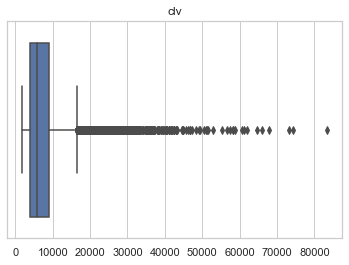

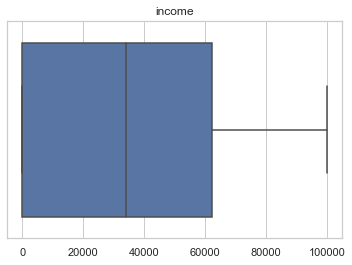

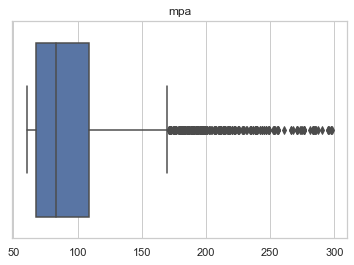

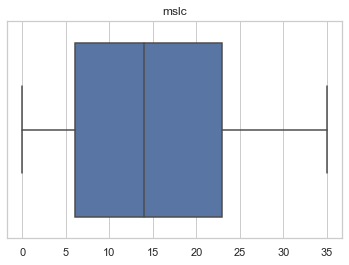

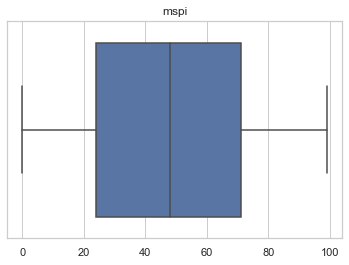

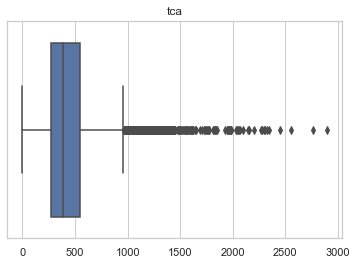

In [42]:
plotOutliers(continuous_df)

# Comment outliers

There are outliers in the continuous variables that have high skewness:   
* Customer Lifetime Value
* Monthly Premium Auto
* Total Claim Amount

As far as I understood there are two possible options:
1. Remove the outliers
1. Create a new category and model just for the outliers

In [43]:
# Lets count the number of outliers that could be dropped

## count clv outliers

In [44]:

iqr_clv = np.nanpercentile(continuous_df.clv ,75) - np.nanpercentile(continuous_df.clv,25)

upper_limit = np.nanpercentile(continuous_df.clv,75) + 1.5*iqr_clv
print(upper_limit)

outliers_clv = continuous_df[continuous_df.clv > upper_limit]
len(outliers_clv)  # This checks the number of points that will be removed


16414.039911750002


817

In [45]:
outliers_clv

,clv,income,mpa,mslc,mspi,tca
8,24127.50402,14072,71,13,3,511.200000
22,24127.50402,14072,71,13,3,511.200000
31,18975.45611,65999,237,1,14,615.927769
50,36707.42639,24804,104,1,28,593.830288
51,33473.34946,33190,106,18,95,508.800000
...,...,...,...,...,...,...
9097,30104.51969,0,94,15,7,848.737364
9110,34611.37896,20090,109,10,59,523.200000
9122,25464.82059,13663,97,1,66,465.600000
9125,19872.26200,0,185,26,35,1950.725547


In [46]:
# Check the remaining outliers in other variables if the outliers were removed

In [47]:
typical_clv = continuous_df[continuous_df.clv <= upper_limit]

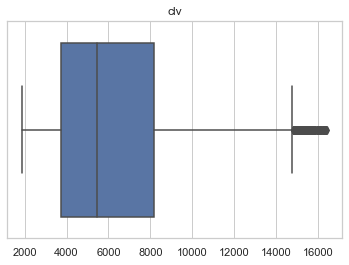

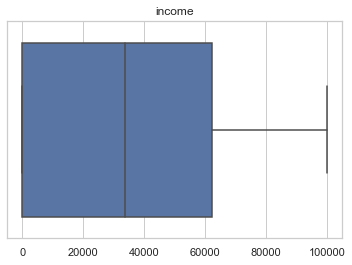

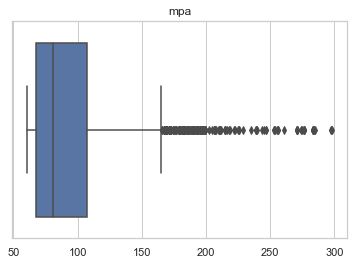

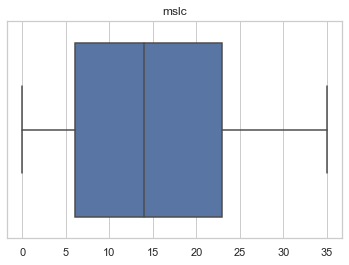

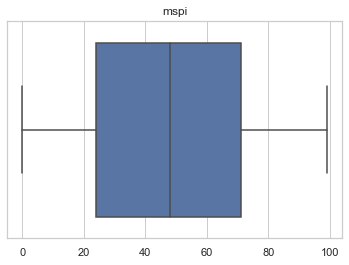

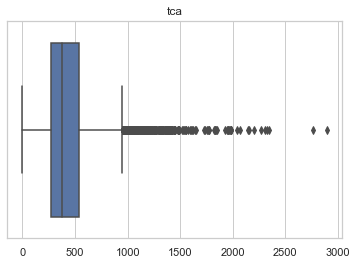

In [48]:
plotOutliers(typical_clv)

In [49]:
# ??? How could be checked the proportion of outliers shared

## count mpa outliers

In [50]:

iqr_mpa = np.nanpercentile(continuous_df.mpa ,75) - np.nanpercentile(continuous_df.mpa,25)

upper_limit = np.nanpercentile(continuous_df.mpa,75) + 1.5*iqr_mpa
print(upper_limit)

outliers_mpa = continuous_df[continuous_df.mpa > upper_limit]
len(outliers_mpa)  # This checks the number of points that will be removed


170.5


430

## count tca outliers

In [51]:

iqr_tca = np.nanpercentile(continuous_df.tca ,75) - np.nanpercentile(continuous_df.tca,25)

upper_limit = np.nanpercentile(continuous_df.tca,75) + 1.5*iqr_tca
print(upper_limit)

outliers_tca = continuous_df[continuous_df.tca > upper_limit]
len(outliers_tca)  # This checks the number of points that will be removed


960.3997301249999


453

I would finally create groups for total claim amount (with qcut) and study them separately.  
Besides I would study the meaning of the outliers in Customer Lifetime Value and decide whether to drop them or not.

## countOutliers function

In [52]:
def countOutliers(df):
    """Counts the outliers in every column of a continuous data frame.
    Returns a data frame with the information of the outliers including its actual sub-dataframes.
    It is just done for the UPPER limit. Not yet for the lower"""
    
    out_data = {'feature':[], 'iqr':[], 'upper':[], 'n_outliers':[], 'outliers_df':[] } #'lower':[], 
    
    for c in df.columns:
        iqr = np.nanpercentile(df[c] ,75) - np.nanpercentile(df[c],25)
        
        upper_limit = np.nanpercentile(df[c],75) + 1.5*iqr
        if upper_limit < df[c].max():
            out_data['feature'].append(c)
            out_data['iqr'].append(iqr)
            out_data['upper'].append(upper_limit)
            
            outliers = df[df[c] > upper_limit]
            out_data['outliers_df'].append(outliers)
            out_data['n_outliers'].append(len(outliers))
            
            print('The variable {} has {} outliers.'.format(c,len(outliers)))
        
        else:
            # out_data['upper'].append(df[c].max())
            print('The variable {} does not have upper outliers.'.format(c))
    out_data = pd.DataFrame(out_data)
    
    return out_data


# Check all the columns for NaN values

In [53]:
customer_df.isna().sum()

state            0
clv              0
response         0
coverage         0
education        0
e2d              0
e_status         0
gender           0
income           0
loc_code         0
m_status         0
mpa              0
mslc             0
mspi             0
noc              0
n_policies       0
policy_type      0
policy           0
rot              0
channel          0
tca              0
vehicle_class    0
vehicle_size     0
dtype: int64

There are any NaN values. I am going to study the 0 in income

In [54]:
customer_df.e_status[customer_df.income == 0].value_counts()

Unemployed    2317
Name: e_status, dtype: int64

In [55]:
customer_df.income[customer_df.e_status == 'Unemployed'].value_counts()

0    2317
Name: income, dtype: int64

This may be a group to be considered appart. Maybe I could get a different approach 

In [56]:
unemployed_df = continuous_df[continuous_df.income == 0]
employed_df = continuous_df[continuous_df.income != 0]

## Plot employed

,clv,income,mpa,mslc,mspi,tca
clv,1.000000,0.002915,0.399491,0.018531,0.011275,0.245464
income,0.002915,1.000000,-0.012372,-0.034453,0.015799,-0.221879
mpa,0.399491,-0.012372,1.000000,0.005887,0.020112,0.636084
mslc,0.018531,-0.034453,0.005887,1.000000,-0.039993,0.001460
mspi,0.011275,0.015799,0.020112,-0.039993,1.000000,-0.003733
tca,0.245464,-0.221879,0.636084,0.001460,-0.003733,1.000000


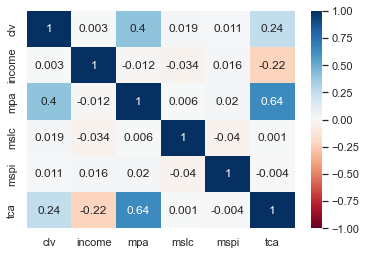

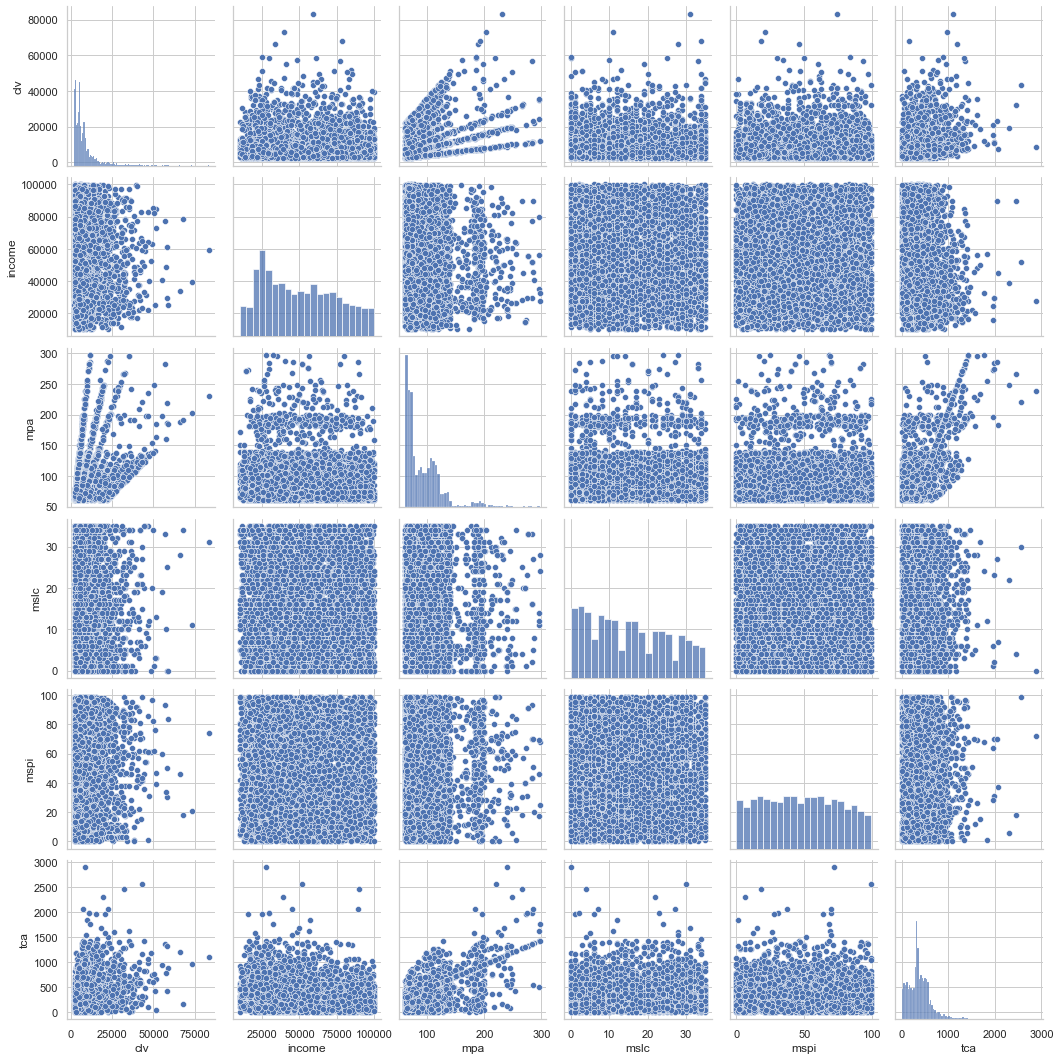

In [57]:
corrPlots(employed_df)

## Plot Unemployed

,clv,income,mpa,mslc,mspi,tca
clv,1.000000,NaN,0.388739,-0.008944,0.005547,0.273482
income,NaN,NaN,NaN,NaN,NaN,NaN
mpa,0.388739,NaN,1.000000,0.002007,0.019980,0.753336
mslc,-0.008944,NaN,0.002007,1.000000,-0.052150,0.013146
mspi,0.005547,NaN,0.019980,-0.052150,1.000000,0.003553
tca,0.273482,NaN,0.753336,0.013146,0.003553,1.000000


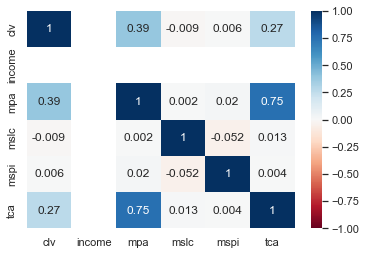

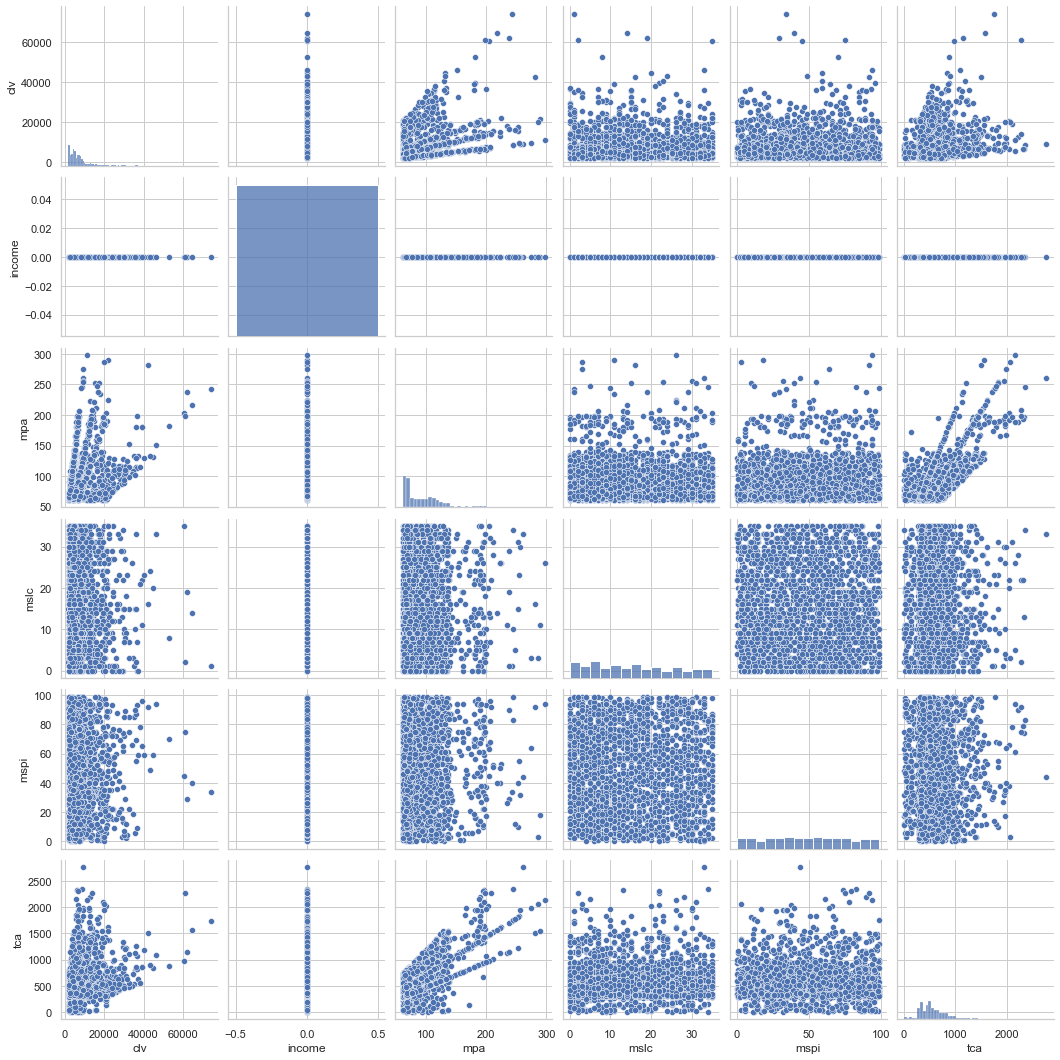

In [58]:
corrPlots(unemployed_df)

# Lab 4.2

## Save categorical_df

In [59]:
categorical_df = discrete_df.copy()
categorical_df.head(10)

,state,response,coverage,education,e_status,gender,loc_code,m_status,noc,n_policies,policy_type,policy,rot,channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,0,9,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,0,4,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,0,2,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,0,8,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [60]:
categorical_df.dtypes

state            object
response         object
coverage         object
education        object
e_status         object
gender           object
loc_code         object
m_status         object
noc               int64
n_policies        int64
policy_type      object
policy           object
rot              object
channel          object
vehicle_class    object
vehicle_size     object
dtype: object

In [61]:
continuous_df.dtypes

clv       float64
income      int64
mpa         int64
mslc        int64
mspi        int64
tca       float64
dtype: object

## Check NaN

In [62]:
categorical_df.isna().sum()

state            0
response         0
coverage         0
education        0
e_status         0
gender           0
loc_code         0
m_status         0
noc              0
n_policies       0
policy_type      0
policy           0
rot              0
channel          0
vehicle_class    0
vehicle_size     0
dtype: int64

## Check unique

In [63]:
for c in categorical_df.columns:
    print(categorical_df[c].unique(), c)

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] state
['No' 'Yes'] response
['Basic' 'Extended' 'Premium'] coverage
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] education
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'] e_status
['F' 'M'] gender
['Suburban' 'Rural' 'Urban'] loc_code
['Married' 'Single' 'Divorced'] m_status
[0 2 1 3 5 4] noc
[1 8 2 7 9 4 3 6 5] n_policies
['Corporate Auto' 'Personal Auto' 'Special Auto'] policy_type
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3'] policy
['Offer1' 'Offer3' 'Offer2' 'Offer4'] rot
['Agent' 'Call Center' 'Web' 'Branch'] channel
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car'] vehicle_class
['Medsize' 'Small' 'Large'] vehicle_size


## Check dtypes

In [64]:
categorical_df.dtypes

state            object
response         object
coverage         object
education        object
e_status         object
gender           object
loc_code         object
m_status         object
noc               int64
n_policies        int64
policy_type      object
policy           object
rot              object
channel          object
vehicle_class    object
vehicle_size     object
dtype: object

Number of Complaints and Number of Policies do not make sense as numeric data type

In [65]:
## Cast noc

In [66]:
categorical_df.noc

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    0
9131    3
9132    0
9133    0
Name: noc, Length: 9134, dtype: int64

In [67]:
categorical_df.noc = pd.Categorical(categorical_df.noc, categories=list(range(6)), ordered=True)

In [68]:
categorical_df.noc

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    0
9131    3
9132    0
9133    0
Name: noc, Length: 9134, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [69]:
## Cast n_policies

In [70]:
categorical_df.n_policies

0       1
1       8
2       2
3       7
4       1
       ..
9129    2
9130    1
9131    2
9132    3
9133    1
Name: n_policies, Length: 9134, dtype: int64

In [71]:
categorical_df.n_policies = pd.Categorical(categorical_df.n_policies, 
                                           categories=list(range(1,10)), 
                                           ordered = True)


In [72]:
categorical_df.n_policies

0       1
1       8
2       2
3       7
4       1
       ..
9129    2
9130    1
9131    2
9132    3
9133    1
Name: n_policies, Length: 9134, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [73]:
categorical_df.dtypes

state              object
response           object
coverage           object
education          object
e_status           object
gender             object
loc_code           object
m_status           object
noc              category
n_policies       category
policy_type        object
policy             object
rot                object
channel            object
vehicle_class      object
vehicle_size       object
dtype: object

In [74]:
categorical_df.select_dtypes('category')

,noc,n_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


## Alpha and Numeric classes

Policy and Renew Offer Type contain both alpha and numeric data

In [75]:
categorical_df.rot.unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [76]:
categorical_df.policy.unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

Check if Renew Offer Type has an order. If so make it ordinal. If not nominal.

## Further cleaning

I would reduce the number of minority classes of the categorical variables: state, education, e_status, number of complaints, number of policies and vehicle class, for instance.  
It would reduce the number of dummified columns. It would require less observations.  
It would not be able to predict data within the minority classes.  
It would reduce the class imbalace. 

Maybe drop response

## Compare policy and policy_type

Policy Type is an aggregation of Policy.  
There are 3 levels of each policy type.

## Combine policies

In [77]:
categorical_df.policy.value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [78]:
categorical_df.policy_type.value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

* It could be dropped one of the columns as they contain the same information with more or less detail
* Policy could be splitted into levels L1, L2, L3 and keep both columns. An aggregation would be required to get the current frequencies shown just in policy column

In [79]:
#  I already splitted the columns in a previous lab

# Lab 4.3

# Train test split

In [ ]:
# which were my data frames?

In [ ]:
# customer_df, continuous_df, categorical_df, discrete_df

In [80]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   state          9134 non-null   object        
 1   clv            9134 non-null   float64       
 2   response       9134 non-null   object        
 3   coverage       9134 non-null   object        
 4   education      9134 non-null   object        
 5   e2d            9134 non-null   datetime64[ns]
 6   e_status       9134 non-null   object        
 7   gender         9134 non-null   object        
 8   income         9134 non-null   int64         
 9   loc_code       9134 non-null   object        
 10  m_status       9134 non-null   object        
 11  mpa            9134 non-null   int64         
 12  mslc           9134 non-null   int64         
 13  mspi           9134 non-null   int64         
 14  noc            9134 non-null   int64         
 15  n_policies     9134 n

In [81]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clv     9134 non-null   float64
 1   income  9134 non-null   int64  
 2   mpa     9134 non-null   int64  
 3   mslc    9134 non-null   int64  
 4   mspi    9134 non-null   int64  
 5   tca     9134 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 428.3 KB


In [82]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          9134 non-null   object  
 1   response       9134 non-null   object  
 2   coverage       9134 non-null   object  
 3   education      9134 non-null   object  
 4   e_status       9134 non-null   object  
 5   gender         9134 non-null   object  
 6   loc_code       9134 non-null   object  
 7   m_status       9134 non-null   object  
 8   noc            9134 non-null   category
 9   n_policies     9134 non-null   category
 10  policy_type    9134 non-null   object  
 11  policy         9134 non-null   object  
 12  rot            9134 non-null   object  
 13  channel        9134 non-null   object  
 14  vehicle_class  9134 non-null   object  
 15  vehicle_size   9134 non-null   object  
dtypes: category(2), object(14)
memory usage: 1017.6+ KB


## X-y split

In [83]:
y = continuous_df.tca

In [87]:
X = pd.concat([categorical_df, continuous_df.iloc[:,:5]], axis=1)
X.columns

Index(['state', 'response', 'coverage', 'education', 'e_status', 'gender',
       'loc_code', 'm_status', 'noc', 'n_policies', 'policy_type', 'policy',
       'rot', 'channel', 'vehicle_class', 'vehicle_size', 'clv', 'income',
       'mpa', 'mslc', 'mspi'],
      dtype='object')

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          9134 non-null   object  
 1   response       9134 non-null   object  
 2   coverage       9134 non-null   object  
 3   education      9134 non-null   object  
 4   e_status       9134 non-null   object  
 5   gender         9134 non-null   object  
 6   loc_code       9134 non-null   object  
 7   m_status       9134 non-null   object  
 8   noc            9134 non-null   category
 9   n_policies     9134 non-null   category
 10  policy_type    9134 non-null   object  
 11  policy         9134 non-null   object  
 12  rot            9134 non-null   object  
 13  channel        9134 non-null   object  
 14  vehicle_class  9134 non-null   object  
 15  vehicle_size   9134 non-null   object  
 16  clv            9134 non-null   float64 
 17  income         9134 non-null   in

## Train test split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6850 entries, 7414 to 2732
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          6850 non-null   object  
 1   response       6850 non-null   object  
 2   coverage       6850 non-null   object  
 3   education      6850 non-null   object  
 4   e_status       6850 non-null   object  
 5   gender         6850 non-null   object  
 6   loc_code       6850 non-null   object  
 7   m_status       6850 non-null   object  
 8   noc            6850 non-null   category
 9   n_policies     6850 non-null   category
 10  policy_type    6850 non-null   object  
 11  policy         6850 non-null   object  
 12  rot            6850 non-null   object  
 13  channel        6850 non-null   object  
 14  vehicle_class  6850 non-null   object  
 15  vehicle_size   6850 non-null   object  
 16  clv            6850 non-null   float64 
 17  income         6850 non-null  

## Split continuous and categorical

In [92]:
X_train_continuous = X_train._get_numeric_data()
X_train_continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6850 entries, 7414 to 2732
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clv     6850 non-null   float64
 1   income  6850 non-null   int64  
 2   mpa     6850 non-null   int64  
 3   mslc    6850 non-null   int64  
 4   mspi    6850 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 321.1 KB


In [93]:
X_train_categorical = X_train.select_dtypes(include=['object','category'])
X_train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6850 entries, 7414 to 2732
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          6850 non-null   object  
 1   response       6850 non-null   object  
 2   coverage       6850 non-null   object  
 3   education      6850 non-null   object  
 4   e_status       6850 non-null   object  
 5   gender         6850 non-null   object  
 6   loc_code       6850 non-null   object  
 7   m_status       6850 non-null   object  
 8   noc            6850 non-null   category
 9   n_policies     6850 non-null   category
 10  policy_type    6850 non-null   object  
 11  policy         6850 non-null   object  
 12  rot            6850 non-null   object  
 13  channel        6850 non-null   object  
 14  vehicle_class  6850 non-null   object  
 15  vehicle_size   6850 non-null   object  
dtypes: category(2), object(14)
memory usage: 816.7+ KB


# Removing Outliers

We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

## Intro

Outliers:  
* Remove them
* Limit their values to the closest whisker value
* Create a separate model for them

As far as I understood the outliers are only true outliers if the distribution is normal and they raise incoherent values.

## Log skewed

In [ ]:
# Firstly I am checking what if transforming the skewed features

In [94]:
cont_log = X_train_continuous.copy()

In [95]:
skewed

clv    3.032280
mpa    2.123546
dtype: float64

In [126]:
def logTransform(df):
    skewed = df.skew()[df.skew()>2]
    if len(skewed) > 0:
        for c in skewed.index:
            df[c] = df[c].apply(lambda x: np.log10(x) if x != 0 else x)
        
    return df

In [97]:
cont_log = logTransform(cont_log)

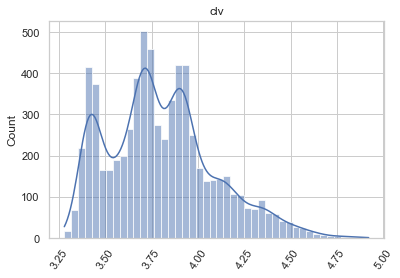

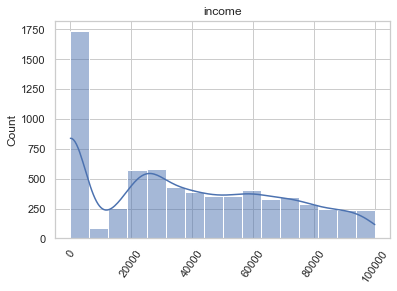

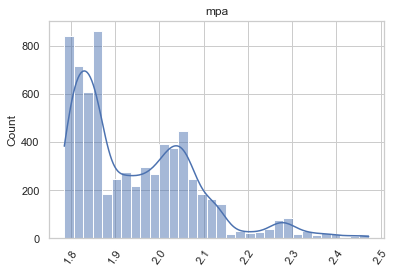

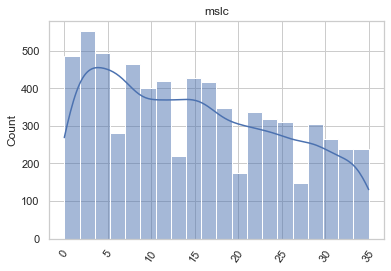

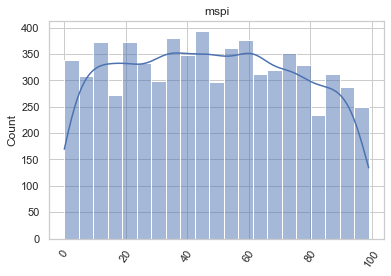

In [98]:
plotContinuous(cont_log)

In [99]:
cont_log.skew()

clv       0.574105
income    0.284564
mpa       1.019447
mslc      0.293158
mspi      0.046971
dtype: float64

## Recount log outliers

In [100]:
cont_log.describe()

,clv,income,mpa,mslc,mspi
count,6850.000000,6850.000000,6850.000000,6850.000000,6850.000000
mean,3.800183,37683.909781,1.945735,15.028029,48.023504
std,0.286063,30350.928230,0.134553,10.080669,27.848204
min,3.278298,0.000000,1.785330,0.000000,0.000000
25%,3.597075,0.000000,1.832509,6.000000,24.000000
50%,3.764260,34328.500000,1.913814,14.000000,48.000000
75%,3.955233,62106.750000,2.037426,23.000000,71.000000
max,4.920777,99961.000000,2.472756,35.000000,99.000000


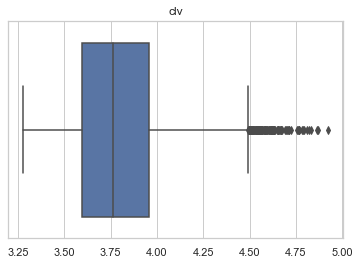

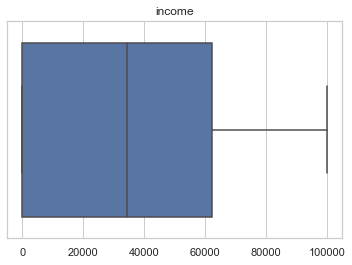

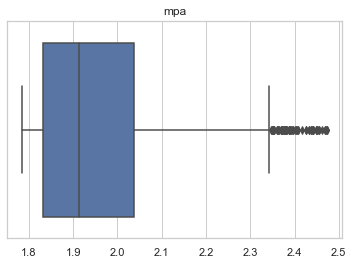

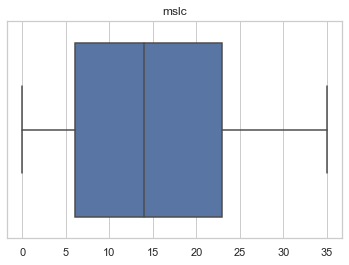

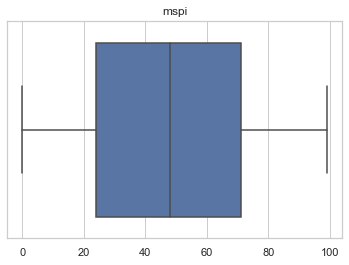

In [101]:
plotOutliers(cont_log)

In [102]:
out_data = countOutliers(cont_log)
out_data

The variable clv has 125 outliers.
The variable income does not have upper outliers.
The variable mpa has 77 outliers.
The variable mslc does not have upper outliers.
The variable mspi does not have upper outliers.


,feature,iqr,upper,n_outliers,outliers_df
0,clv,0.358158,4.492470,125,clv income mpa mslc mspi 7...
1,mpa,0.204918,2.344803,77,clv income mpa mslc mspi 1...


Comparing with the amount of outliers counted previously, when the log transfom is applied the number of outliers reduces.

In [ ]:
# ??? How can I check to which percentile corresponds the log transfomed upper limit? 

In [103]:
upper_limit = 10**out_data.loc[0,'upper']
upper_limit

31079.18912667725

In [106]:
10**4.4924696

31079.18345233063

## Remove outliers by indexes

In [107]:
outliers_indexes = out_data.loc[0,'outliers_df'].index
outliers_indexes

Int64Index([7283, 6982, 4298, 8703, 6329, 2303, 5824, 6817, 6884, 1120,
            ...
            4078, 7303, 6102, 4930,  375, 5037, 5343, 5346, 2775, 5272],
           dtype='int64', length=125)

In [109]:
outliers_indexes2 = outliers_indexes.append(out_data.loc[1,'outliers_df'].index)
outliers_indexes2

Int64Index([7283, 6982, 4298, 8703, 6329, 2303, 5824, 6817, 6884, 1120,
            ...
            6905, 1383, 6182, 8266,  404,  292, 8352, 6177, 3854,  755],
           dtype='int64', length=202)

In [112]:
outliers_indexes2 = outliers_indexes2.drop_duplicates()
outliers_indexes2

Int64Index([7283, 6982, 4298, 8703, 6329, 2303, 5824, 6817, 6884, 1120,
            ...
            6905, 1383, 6182, 8266,  404,  292, 8352, 6177, 3854,  755],
           dtype='int64', length=191)

In [113]:
cont_log.drop(index=outliers_indexes2, inplace=True)
X_train_categorical.drop(index=outliers_indexes2, inplace=True)
y_train.drop(index=outliers_indexes2, inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
cont_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clv     6659 non-null   float64
 1   income  6659 non-null   int64  
 2   mpa     6659 non-null   float64
 3   mslc    6659 non-null   int64  
 4   mspi    6659 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 312.1 KB


In [116]:
X_train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          6659 non-null   object  
 1   response       6659 non-null   object  
 2   coverage       6659 non-null   object  
 3   education      6659 non-null   object  
 4   e_status       6659 non-null   object  
 5   gender         6659 non-null   object  
 6   loc_code       6659 non-null   object  
 7   m_status       6659 non-null   object  
 8   noc            6659 non-null   category
 9   n_policies     6659 non-null   category
 10  policy_type    6659 non-null   object  
 11  policy         6659 non-null   object  
 12  rot            6659 non-null   object  
 13  channel        6659 non-null   object  
 14  vehicle_class  6659 non-null   object  
 15  vehicle_size   6659 non-null   object  
dtypes: category(2), object(14)
memory usage: 793.9+ KB


In [119]:
y_train.index

Int64Index([7414, 5108, 7628, 2735, 5537, 8533, 4786, 8648, 7036, 1343,
            ...
            2599,  705, 3468, 6744, 5874, 4373, 7891, 4859, 3264, 2732],
           dtype='int64', length=6659)

## Recount II

In [114]:
out_data2 = countOutliers(cont_log)
out_data2

The variable clv has 29 outliers.
The variable income does not have upper outliers.
The variable mpa has 24 outliers.
The variable mslc does not have upper outliers.
The variable mspi does not have upper outliers.


,feature,iqr,upper,n_outliers,outliers_df
0,clv,0.349674,4.462305,29,clv income mpa mslc mspi 2...
1,mpa,0.196875,2.324696,24,clv income mpa mslc mspi 7...


## Remove outliers by values

In [ ]:
# data_timelag_outliers_dropped = data[data['TIMELAG'] <= upper_limit].copy()


## Limit values to upper limit

In [ ]:
# For mpa

#cont_log.mpa=cont_log.mpa.clip(cont_log.mpa.min(),out_data2.loc[1,'upper'])#.describe()

## Bin outliers

## define removeOutliers function

In [317]:
def removeOutliers(X_train_continuous, X_train_categorical, y_train):
    """This function remove the outliers in the training set:
    X_train_continuous
    X_train_categorical
    y_train"""
    
    # LogTransform: check skewness in the continuous features and logTransform them
    X_train_continuous = logTransform(X_train_continuous)
    
    # Plots outliers
    plotOutliers(X_train_continuous)
    
    # Counts outliers and gets its info
    outliers_data = countOutliers(X_train_continuous)
    
    
    # Removing the outliers
    if len(outliers_data) > 0:
        # Get the indices of the outliers
        indices = pd.Index([])
        for i in outliers_data.index:
            indices = indices.append(out_data.loc[i,'outliers_df'].index)
        indices = indices.drop_duplicates()
        
        # Drop the outliers
        X_train_continuous.drop(index=indices, inplace=True)
        X_train_categorical.drop(index=indices, inplace=True)
        y_train.drop(index=indices, inplace=True)
    
    else:
        print('There was not found any outlier.')
    
    return X_train_continuous, X_train_categorical, y_train
    
    

# Create a copy of the dataframe for the data wrangling

In [175]:
X_tCont, X_tCat, y_tW = cont_log.copy(), X_train_categorical.copy(), y_train.copy()

# Normalize the continuous variables

I have already reduced the skewness of the continuous features with logTransform.  
Technicaly, normalizing mean dividing each observation by the standard deviation, right? So the resulting standard deviation equals 1.  
Besides Eulalia adviced not to standardize after including the categorical features

Let's try and create a function to normalize the continuous variables.  
Check the std before and after.  
Plot the distributions after normalization. 

In [176]:
# Check the standard deviation
X_tCont.std()

clv           0.264696
income    30434.739381
mpa           0.124519
mslc         10.056924
mspi         27.870926
dtype: float64

In [133]:
def normalize(df):
    """This function normalizes, std = 1, the features of a continuous df"""
    for f in df.columns:
        s = df[f].std()
        df[f] = df[f].apply(lambda x: x/s)
    return df

In [177]:
X_tCont = normalize(X_tCont)
X_tCont.std()

clv       1.0
income    1.0
mpa       1.0
mslc      1.0
mspi      1.0
dtype: float64

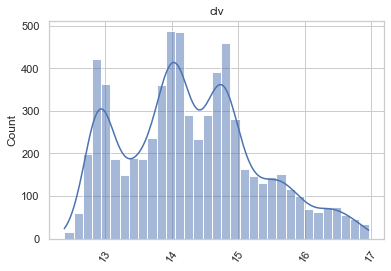

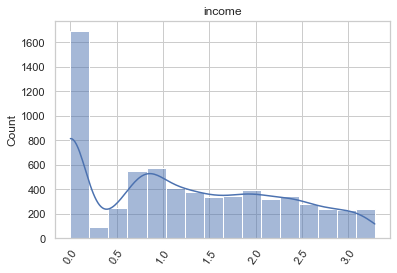

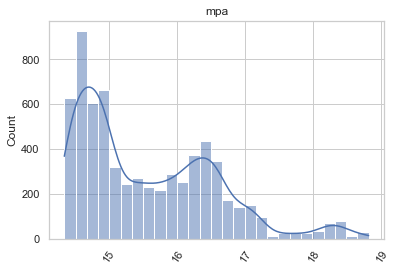

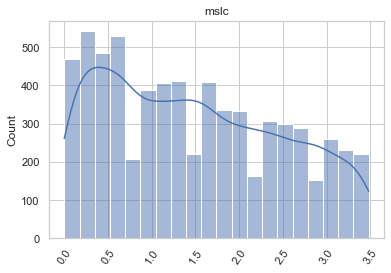

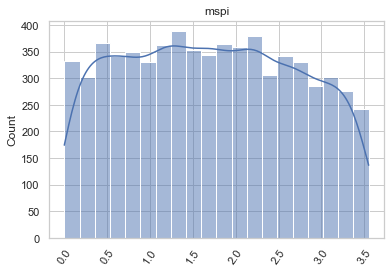

In [142]:
plotContinuous(X_tCont)

In [178]:
X_tCont.skew()

clv       0.374060
income    0.287032
mpa       0.844293
mslc      0.299407
mspi      0.054970
dtype: float64

# Encode Categorical variables

Drop duplicated policy column.  
Split ordinal and nominal.  
Apply a mapper to each ordinal if not yet applied.  
Use one hot encoder with the rest.

In [ ]:
# Categorical info

In [179]:
X_tCat.head()

,state,response,coverage,education,e_status,gender,loc_code,m_status,noc,n_policies,policy_type,policy,rot,channel,vehicle_class,vehicle_size
7414,Oregon,No,Extended,High School or Below,Unemployed,M,Suburban,Single,0,4,Corporate Auto,Corporate L2,Offer1,Branch,Two-Door Car,Medsize
5108,Oregon,No,Basic,Bachelor,Employed,M,Suburban,Divorced,0,1,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
7628,Arizona,No,Extended,College,Unemployed,F,Suburban,Single,2,1,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize
2735,Nevada,No,Extended,High School or Below,Employed,M,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Branch,SUV,Medsize
5537,Arizona,No,Extended,Bachelor,Employed,F,Urban,Married,0,2,Special Auto,Special L2,Offer3,Branch,Four-Door Car,Medsize


In [145]:
X_tCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          6659 non-null   object  
 1   response       6659 non-null   object  
 2   coverage       6659 non-null   object  
 3   education      6659 non-null   object  
 4   e_status       6659 non-null   object  
 5   gender         6659 non-null   object  
 6   loc_code       6659 non-null   object  
 7   m_status       6659 non-null   object  
 8   noc            6659 non-null   category
 9   n_policies     6659 non-null   category
 10  policy_type    6659 non-null   object  
 11  policy         6659 non-null   object  
 12  rot            6659 non-null   object  
 13  channel        6659 non-null   object  
 14  vehicle_class  6659 non-null   object  
 15  vehicle_size   6659 non-null   object  
dtypes: category(2), object(14)
memory usage: 793.9+ KB


In [146]:
X_tCat.describe()

,state,response,coverage,education,e_status,gender,loc_code,m_status,noc,n_policies,policy_type,policy,rot,channel,vehicle_class,vehicle_size
count,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659,6659
unique,5,2,3,5,5,2,3,3,6,9,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,2294,5718,4148,2004,4133,3372,4209,3854,5290,2399,4953,2493,2722,2538,3427,4682


In [ ]:
# Check before drop policy_type

In [156]:
(X_tCat[X_tCat.policy_type.str.contains('Corporate')].index == X_tCat[X_tCat.policy.str.contains('Corporate')].index)\
.sum() 


1433

In [154]:
X_tCat[X_tCat.policy_type.str.contains('Corporate')].index


Int64Index([7414, 8533, 8648, 3991, 7007,  502, 5352, 9030, 1633, 4737,
            ...
             659, 8291, 2496, 2046, 7877, 6036, 2897, 2222, 4373, 4859],
           dtype='int64', length=1433)

In [ ]:
# drop policy_type and response

In [180]:
X_tCat.drop(columns=['response','policy_type'], inplace=True)

In [254]:
# Create a list of dropped categories
dropped_categories = ['response','policy_type']

## Encode Ordinals

In [159]:
X_tCat.noc.cat.ordered

True

In [160]:
X_tCat.coverage.value_counts()

Basic       4148
Extended    1949
Premium      562
Name: coverage, dtype: int64

In [181]:
coverage_mapper = {'Basic':0,'Extended':1,'Premium':2}
X_tCat.coverage = X_tCat.coverage.map(coverage_mapper)
X_tCat.coverage.value_counts()

0    4148
1    1949
2     562
Name: coverage, dtype: int64

In [182]:
X_tCat.coverage = pd.Categorical(X_tCat.coverage, ordered = True)
X_tCat.coverage

7414    1
5108    0
7628    1
2735    1
5537    1
       ..
4373    1
7891    0
4859    0
3264    2
2732    0
Name: coverage, Length: 6659, dtype: category
Categories (3, int64): [0 < 1 < 2]

### defineOrdinal function

In [163]:
def defineOrdinal(df, feat, mapper):
    """Defines a feature as a Categorical Ordered
    return a series"""
    df[feat] = df[feat].map(mapper)
    df[feat] = pd.Categorical(df[feat], ordered = True)
    
    return df[feat]

In [248]:
def defOrdinals(df_cat, mappers_dic):
    """Defines as Categoricals Ordered all the features inside a mapper dictionary of mappers 
    returns a dataframe with all the ordinal features transformed"""
    for feat in mappers_dic.keys():
        df_cat[feat] = df_cat[feat].map(mappers_dic[feat])
        df_cat[feat] = pd.Categorical(df_cat[feat], ordered = True)
    
    return df_cat

### Create mappers

In [164]:
X_tCat.e_status.unique()

array(['Unemployed', 'Employed', 'Medical Leave', 'Retired', 'Disabled'],
      dtype=object)

In [165]:
e_status_mapper = {'Unemployed':0,'Medical Leave':1,'Disabled':1,'Retired':1,'Employed':2}

In [166]:
X_tCat.education.unique()

array(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'],
      dtype=object)

In [169]:
education_mapper = {'High School or Below':0, 'College':1,'Bachelor':2, 'Master':3, 'Doctor':3}

In [167]:
X_tCat.loc_code.unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [170]:
loc_code_mapper = {'Rural':0,'Suburban':1,'Urban':2}

In [168]:
X_tCat.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [171]:
vs_mapper = {'Small':0,'Medsize':1,'Large':2}

In [255]:
mappers ={}

In [256]:
mappers['coverage'] = coverage_mapper
mappers['e_status'] = e_status_mapper
mappers['education'] = education_mapper
mappers['loc_code'] = loc_code_mapper
mappers['vehicle_size'] = vs_mapper


In [257]:
mappers

{'coverage': {'Basic': 0, 'Extended': 1, 'Premium': 2},
 'e_status': {'Unemployed': 0,
  'Medical Leave': 1,
  'Disabled': 1,
  'Retired': 1,
  'Employed': 2},
 'education': {'High School or Below': 0,
  'College': 1,
  'Bachelor': 2,
  'Master': 3,
  'Doctor': 3},
 'loc_code': {'Rural': 0, 'Suburban': 1, 'Urban': 2},
 'vehicle_size': {'Small': 0, 'Medsize': 1, 'Large': 2}}

### Encode Ordinals

In [183]:
X_tCat.e_status = defineOrdinal(X_tCat,'e_status',e_status_mapper)

In [184]:
X_tCat.education = defineOrdinal(X_tCat,'education',education_mapper)

In [185]:
X_tCat.loc_code = defineOrdinal(X_tCat,'loc_code',loc_code_mapper)

In [186]:
X_tCat.vehicle_size = defineOrdinal(X_tCat,'vehicle_size',vs_mapper)

In [ ]:
# !!! Improve the function --> create a dictionary of mappers? --> done

In [187]:
X_tCat.dtypes

state              object
coverage         category
education        category
e_status         category
gender             object
loc_code         category
m_status           object
noc              category
n_policies       category
policy             object
rot                object
channel            object
vehicle_class      object
vehicle_size     category
dtype: object

## Split Nominal and Ordinals

In [188]:
X_tc_ordinal = X_tCat.select_dtypes('category')

In [189]:
X_tc_nominal = X_tCat.select_dtypes('object')

## Encode Nominals

In [192]:
# Save the indices, just in case
nominal_indices = X_tc_nominal.index
nominal_indices

Int64Index([7414, 5108, 7628, 2735, 5537, 8533, 4786, 8648, 7036, 1343,
            ...
            2599,  705, 3468, 6744, 5874, 4373, 7891, 4859, 3264, 2732],
           dtype='int64', length=6659)

In [ ]:
# Create an array with the nominal categories in the data frame

In [203]:
def saveCategories(nominal_train, sample_df=categorical_df):
    """Create a list of categories to be passed to OneHotEncoder"""
    categories = []
    for c in nominal_train.columns:
        categories.append(categorical_df[c].unique())
    return categories

In [204]:
categories = saveCategories(X_tc_nominal)
categories

[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Married', 'Single', 'Divorced'], dtype=object),
 array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
        'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object),
 array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object),
 array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
        'Luxury Car'], dtype=object)]

In [206]:
encoder = OneHotEncoder(categories=categories, sparse=False, drop='first')
encoder.fit(X_tc_nominal)

OneHotEncoder(categories=[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object),
                          array(['F', 'M'], dtype=object),
                          array(['Married', 'Single', 'Divorced'], dtype=object),
                          array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object),
                          array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object),
                          array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object),
                          array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)],
              drop='first', sparse=False)

In [212]:
encoder.get_feature_names_out() # don't forget the parentheses

array(['state_Arizona', 'state_Nevada', 'state_California',
       'state_Oregon', 'gender_M', 'm_status_Single', 'm_status_Divorced',
       'policy_Personal L3', 'policy_Corporate L2', 'policy_Personal L1',
       'policy_Special L2', 'policy_Corporate L1', 'policy_Personal L2',
       'policy_Special L1', 'policy_Special L3', 'rot_Offer3',
       'rot_Offer2', 'rot_Offer4', 'channel_Call Center', 'channel_Web',
       'channel_Branch', 'vehicle_class_Four-Door Car',
       'vehicle_class_SUV', 'vehicle_class_Luxury SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Luxury Car'],
      dtype=object)

In [211]:
X_tc_nominal_encoded = encoder.transform(X_tc_nominal)

In [213]:
X_tc_nominal_encoded = pd.DataFrame(X_tc_nominal_encoded, columns = encoder.get_feature_names_out())
X_tc_nominal_encoded

,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6656,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6657,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Concat nominal_encoded and ordinal

In [ ]:
# Restore nominal encoded indices

In [223]:
X_tc_nominal_encoded.index = nominal_indices
X_tc_nominal_encoded.index

Int64Index([7414, 5108, 7628, 2735, 5537, 8533, 4786, 8648, 7036, 1343,
            ...
            2599,  705, 3468, 6744, 5874, 4373, 7891, 4859, 3264, 2732],
           dtype='int64', length=6659)

In [224]:
X_tCat = pd.concat([X_tc_ordinal,X_tc_nominal_encoded], axis=1)

In [225]:
X_tCat.shape

(6659, 33)

In [226]:
X_tCat.head()

,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car
7414,1,0,0,1,0,4,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5108,0,2,2,1,0,1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7628,1,1,0,1,2,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2735,1,0,2,0,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5537,1,2,2,2,0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## function encodeCategoricals 

In [294]:
def encodeCategoricals(df, ord_mapper, fit=False, categories='auto'):
    """Encodes a dataframe of categorical variables
    * ord_mapper: for ordinal categories
    - Set fit to True if model OneHotEncoder not yet fitted
    - requires encoder as fitted OneHotEncoder if fit=False 
    
    returns a dataframe of encoded categorical variables"""
    
    # Define encoder as global to avoid UnboundLocalError
    global encoder
    
    # Defines and encode ordinal variables
    df = defOrdinals(df, mappers_dic = ord_mapper)
    
    # Split Nominal and ordinals
    df_ordinal = df.select_dtypes('category')
    df_nominal = df.select_dtypes('object')
    
    #Save the indices
    indices = df_nominal.index
    
    # OneHotEncoder
    if fit: 
        # Fit
        encoder = OneHotEncoder(categories=categories, sparse=False, drop='first')
        encoder.fit(df_nominal)
    # Transform
    df_nominal_encoded = encoder.transform(df_nominal)
    df_nominal_encoded = pd.DataFrame(df_nominal_encoded, columns = encoder.get_feature_names_out())
    
    # restore indices
    df_nominal_encoded.index = indices
    
    # concat nominal and ordinal into de categorical
    df = pd.concat([df_ordinal,df_nominal_encoded], axis=1)
    
    return df



# Process X_test

In [ ]:
# X_test: 
# split continuous and categorical 
# I will NOT remove outliers from the X_test
# Apply logTransform  
# normalize continuous
# encode categorical

In [228]:
def numericCategorical(df):
    """Split a dataframe into numeric or categorical according to the data types
    (If it is passaed after continuousDiscrete all numeric should be CONTINUOUS)"""
    
    df_numeric = df._get_numeric_data()
    df_categorical = df.select_dtypes(include=['object','category'])
    
    return df_numeric, df_categorical


In [229]:
X_test_continuous, X_test_categorical = numericCategorical(X_test)

In [230]:
# Create a copy
X_test_contCopy = X_test_continuous.copy()

In [295]:
X_test_catCopy = X_test_categorical.copy()

In [233]:
# LogTransform continuous
# Check skewness
X_test_contCopy.skew()

clv       2.634499
income    0.294024
mpa       2.173393
mslc      0.235249
mspi      0.020055
dtype: float64

In [234]:
X_test_contCopy = logTransform(X_test_contCopy)

In [235]:
X_test_contCopy.skew()

clv       0.579869
income    0.294024
mpa       0.967260
mslc      0.235249
mspi      0.020055
dtype: float64

In [236]:
# Normalize continuous
# Check std()
X_test_contCopy.std()

clv           0.275963
income    30473.164156
mpa           0.131366
mslc         10.050358
mspi         28.084352
dtype: float64

In [237]:
X_test_contCopy = normalize(X_test_contCopy)

In [238]:
X_test_contCopy.std()

clv       1.0
income    1.0
mpa       1.0
mslc      1.0
mspi      1.0
dtype: float64

In [253]:
# Encode X_train_categorical

In [297]:
# Drop some columns
X_test_catCopy.drop(columns=dropped_categories, inplace=True, errors='ignore')

In [ ]:
# Encoding

In [298]:
X_test_catCopy = encodeCategoricals(X_test_catCopy,mappers, categories=categories)
X_test_catCopy.head()

,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car
2182,0,1,2,1,0,5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7823,0,2,0,1,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1651,2,1,2,1,0,6,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
888,1,2,1,1,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3844,1,1,0,1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# UnboundLocalError: local variable 'encoder' referenced before assignment

# Time variable

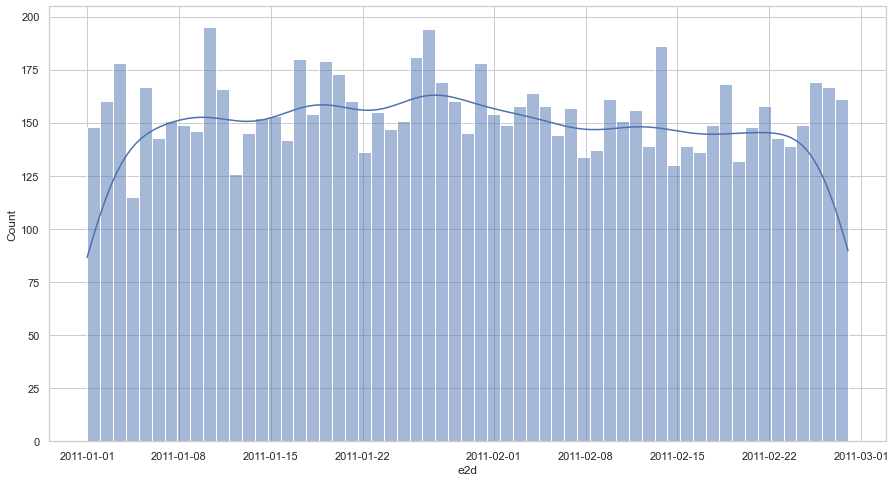

In [276]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.histplot(effective_date, kde=True, bins = 59)
plt.show()

In [282]:
# Get the months
effective_month = effective_date.apply(lambda x: x.month)

# Filter by the indices of train and test set



In [ ]:
# Check indices

In [280]:
continuous_df.index

RangeIndex(start=0, stop=9134, step=1)

In [285]:
effective_month_train = effective_month[effective_month.index.isin(X_train.index)]
effective_month_test = effective_month[effective_month.index.isin(X_test.index)]

In [286]:
effective_month_train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            9121, 9123, 9124, 9125, 9126, 9127, 9128, 9129, 9131, 9132],
           dtype='int64', length=6850)

In [ ]:
# ! This column should be merged by index

# Concat and merge

In [ ]:
# X_test_contCopy
# X_test_catCopy
# X_tCat
# X_tCont
# effective_month

## Check consistency

In [287]:
X_test_contCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2182 to 768
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clv     2284 non-null   float64
 1   income  2284 non-null   float64
 2   mpa     2284 non-null   float64
 3   mslc    2284 non-null   float64
 4   mspi    2284 non-null   float64
dtypes: float64(5)
memory usage: 107.1 KB


In [299]:
X_test_catCopy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2182 to 768
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   coverage                     2284 non-null   category
 1   education                    2284 non-null   category
 2   e_status                     2284 non-null   category
 3   loc_code                     2284 non-null   category
 4   noc                          2284 non-null   category
 5   n_policies                   2284 non-null   category
 6   vehicle_size                 2284 non-null   category
 7   state_Arizona                2284 non-null   float64 
 8   state_Nevada                 2284 non-null   float64 
 9   state_California             2284 non-null   float64 
 10  state_Oregon                 2284 non-null   float64 
 11  gender_M                     2284 non-null   float64 
 12  m_status_Single              2284 non-null   float64 
 13  m

In [290]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2182 to 768
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          2284 non-null   object  
 1   response       2284 non-null   object  
 2   coverage       2284 non-null   object  
 3   education      2284 non-null   object  
 4   e_status       2284 non-null   object  
 5   gender         2284 non-null   object  
 6   loc_code       2284 non-null   object  
 7   m_status       2284 non-null   object  
 8   noc            2284 non-null   category
 9   n_policies     2284 non-null   category
 10  policy_type    2284 non-null   object  
 11  policy         2284 non-null   object  
 12  rot            2284 non-null   object  
 13  channel        2284 non-null   object  
 14  vehicle_class  2284 non-null   object  
 15  vehicle_size   2284 non-null   object  
 16  clv            2284 non-null   float64 
 17  income         2284 non-null   

In [293]:
X_test_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2182 to 768
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   state          2284 non-null   object  
 1   response       2284 non-null   object  
 2   coverage       2284 non-null   object  
 3   education      2284 non-null   object  
 4   e_status       2284 non-null   object  
 5   gender         2284 non-null   object  
 6   loc_code       2284 non-null   object  
 7   m_status       2284 non-null   object  
 8   noc            2284 non-null   category
 9   n_policies     2284 non-null   category
 10  policy_type    2284 non-null   object  
 11  policy         2284 non-null   object  
 12  rot            2284 non-null   object  
 13  channel        2284 non-null   object  
 14  vehicle_class  2284 non-null   object  
 15  vehicle_size   2284 non-null   object  
dtypes: category(2), object(14)
memory usage: 272.7+ KB


In [289]:
X_tCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   coverage                     6659 non-null   category
 1   education                    6659 non-null   category
 2   e_status                     6659 non-null   category
 3   loc_code                     6659 non-null   category
 4   noc                          6659 non-null   category
 5   n_policies                   6659 non-null   category
 6   vehicle_size                 6659 non-null   category
 7   state_Arizona                6659 non-null   float64 
 8   state_Nevada                 6659 non-null   float64 
 9   state_California             6659 non-null   float64 
 10  state_Oregon                 6659 non-null   float64 
 11  gender_M                     6659 non-null   float64 
 12  m_status_Single              6659 non-null   float64 
 13  

In [291]:
X_tCont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clv     6659 non-null   float64
 1   income  6659 non-null   float64
 2   mpa     6659 non-null   float64
 3   mslc    6659 non-null   float64
 4   mspi    6659 non-null   float64
dtypes: float64(5)
memory usage: 312.1 KB


## Concat

In [301]:
X_train = pd.concat([X_tCont,X_tCat], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   clv                          6659 non-null   float64 
 1   income                       6659 non-null   float64 
 2   mpa                          6659 non-null   float64 
 3   mslc                         6659 non-null   float64 
 4   mspi                         6659 non-null   float64 
 5   coverage                     6659 non-null   category
 6   education                    6659 non-null   category
 7   e_status                     6659 non-null   category
 8   loc_code                     6659 non-null   category
 9   noc                          6659 non-null   category
 10  n_policies                   6659 non-null   category
 11  vehicle_size                 6659 non-null   category
 12  state_Arizona                6659 non-null   float64 
 13  

In [305]:
X_train = pd.merge(X_train, effective_month,how='left',left_index=True, right_index=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 7414 to 2732
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   clv                          6659 non-null   float64 
 1   income                       6659 non-null   float64 
 2   mpa                          6659 non-null   float64 
 3   mslc                         6659 non-null   float64 
 4   mspi                         6659 non-null   float64 
 5   coverage                     6659 non-null   category
 6   education                    6659 non-null   category
 7   e_status                     6659 non-null   category
 8   loc_code                     6659 non-null   category
 9   noc                          6659 non-null   category
 10  n_policies                   6659 non-null   category
 11  vehicle_size                 6659 non-null   category
 12  state_Arizona                6659 non-null   float64 
 13  

In [306]:
X_test = pd.concat([X_test_contCopy,X_test_catCopy], axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2182 to 768
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   clv                          2284 non-null   float64 
 1   income                       2284 non-null   float64 
 2   mpa                          2284 non-null   float64 
 3   mslc                         2284 non-null   float64 
 4   mspi                         2284 non-null   float64 
 5   coverage                     2284 non-null   category
 6   education                    2284 non-null   category
 7   e_status                     2284 non-null   category
 8   loc_code                     2284 non-null   category
 9   noc                          2284 non-null   category
 10  n_policies                   2284 non-null   category
 11  vehicle_size                 2284 non-null   category
 12  state_Arizona                2284 non-null   float64 
 13  s

In [307]:
X_test = pd.merge(X_test, effective_month, how='left',left_index=True, right_index=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2182 to 768
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   clv                          2284 non-null   float64 
 1   income                       2284 non-null   float64 
 2   mpa                          2284 non-null   float64 
 3   mslc                         2284 non-null   float64 
 4   mspi                         2284 non-null   float64 
 5   coverage                     2284 non-null   category
 6   education                    2284 non-null   category
 7   e_status                     2284 non-null   category
 8   loc_code                     2284 non-null   category
 9   noc                          2284 non-null   category
 10  n_policies                   2284 non-null   category
 11  vehicle_size                 2284 non-null   category
 12  state_Arizona                2284 non-null   float64 
 13  s

In [308]:
X_train.head()

,clv,income,mpa,mslc,mspi,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car,e2d
7414,14.074174,0.000000,15.239647,0.397736,2.798615,1,0,0,1,0,4,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
5108,12.989984,2.602027,14.817792,1.093774,2.655097,0,2,2,1,0,1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7628,13.170440,0.000000,15.882894,1.392076,2.045142,1,1,0,1,2,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2735,15.728770,1.727105,16.755341,3.281321,1.004631,1,0,2,0,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
5537,15.291756,1.091910,15.845986,2.088114,2.906254,1,2,2,2,0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [309]:
X_test.head()

,clv,income,mpa,mslc,mspi,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car,e2d
2182,13.580091,2.042092,14.045488,1.293486,0.925782,0,1,2,1,0,5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7823,12.193588,0.000000,13.949655,0.994989,2.884168,0,2,0,1,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1651,14.420740,1.750754,15.799740,0.397996,0.249249,2,1,2,1,0,6,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
888,14.253911,0.908636,18.105140,0.000000,2.563705,1,2,1,1,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3844,13.140648,0.000000,15.988705,1.492484,1.602316,1,1,0,1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


# MinMax vs Standard Scale

The continuous features are already normalize (std=1) the min max scaler will scale the ranges to (0,1).  
The Standard Scaler would make mean = 0, and redundantly std=1?.  
I will just apply minmax scaler, incase KNN is applied.

In [311]:
scaler = MinMaxScaler()
scaler.fit(X_train)
features = scaler.get_feature_names_out()
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features)

In [315]:
X_train.describe()

,clv,income,mpa,mslc,mspi,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car,e2d
count,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000,6659.000000
mean,0.415297,0.376898,0.273487,0.427688,0.483526,0.230740,0.420784,0.683136,0.486034,0.076858,0.247860,0.455924,0.186064,0.094158,0.344496,0.284427,0.493618,0.270761,0.150473,0.374381,0.065625,0.136357,0.016519,0.037243,0.233068,0.008259,0.016219,0.160384,0.318366,0.112479,0.188767,0.144616,0.285478,0.514642,0.191921,0.013365,0.050758,0.012464,0.466136
std,0.218434,0.304466,0.223516,0.287341,0.281525,0.323022,0.334350,0.430411,0.302984,0.182496,0.300883,0.268870,0.389188,0.292071,0.475239,0.451175,0.499997,0.444386,0.357561,0.483999,0.247645,0.343193,0.127470,0.189371,0.422817,0.090512,0.126325,0.366990,0.465877,0.315979,0.391353,0.351740,0.451676,0.499823,0.393841,0.114842,0.219520,0.110954,0.498889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255673,0.000000,0.084688,0.171429,0.242424,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.392726,0.341743,0.211383,0.400000,0.474747,0.000000,0.333333,1.000000,0.500000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.544233,0.623758,0.438085,0.657143,0.717172,0.500000,0.666667,1.000000,0.500000,0.000000,0.375000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check categorical nominal

In [316]:
X_train.state_Nevada.value_counts()

0.0    6032
1.0     627
Name: state_Nevada, dtype: int64

# processData Function

In [ ]:
# Required parameters

effective_date  
mappers  
categories if available  
effective_month  (additional processed features)  
dropped_categories (unnecessary features)


In [ ]:
# Required sub-functions

numericCategorical  
removeOutliers  
logTransform  
normalize  
encodeCategoricals  
***
defOrdinals


In [ ]:
# The function

In [327]:
def processData(X,y, ord_mapper, drop_feat, add_feat, categories = 'auto'):
    """Process data after preprocessing
    Inputs: 
        X,y
        ord_mapper: dictionary of dictionaries for the ordinal features
        drop_feat: list of features to be dropped
        add_feat: (time-like feature to be merged after logTransform and normalize)
        categories
    Sub-functions:
        numericCategorical
        removeOutliers
        logTransform
        normalize
        encodeCategoricals
    Returns: 
        X_train (without outliers) (normalized, encoded and scaled) 
        X_test (normalized, encoded and scaled)
        y_train (without outliers)
        y_test
    """
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    
    
    # Drop some features
    if len(drop_feat)>0:
        X_train.drop(columns=drop_feat, inplace=True, errors='ignore')
        X_test.drop(columns=drop_feat, inplace=True, errors='ignore')
    
    # Split X_train and X_test into continuous and categorical
    X_train_continuous, X_train_categorical = numericCategorical(X_train)
    X_test_continuous, X_test_categorical = numericCategorical(X_test)
    
    # Remove outliers from train set (reduce skewness - logTransform)
    X_train_continuous, X_train_categorical, y_train = removeOutliers(X_train_continuous, X_train_categorical, y_train)
    
    # LogTransform X_test
    X_test_continuous = logTransform(X_test_continuous)
    
    # Normalize continuos train and test
    X_train_continuous = normalize(X_train_continuous)
    X_test_continuous = normalize(X_test_continuous)
    
    
    # Encode X_train_categorical
    X_train_categorical = encodeCategoricals(X_train_categorical, ord_mapper, fit=True, categories=categories)
    # Encode X_test_categorical
    X_test_categorical = encodeCategoricals(X_test_categorical, ord_mapper)
    
    
    # Concat continuous and categorical
    X_train = pd.concat([X_train_continuous,X_train_categorical], axis=1)
    X_test = pd.concat([X_test_continuous,X_test_categorical], axis=1)
    
    # Merge Additional Features
    X_train = pd.merge(X_train, add_feat,how='left',left_index=True, right_index=True)
    X_test = pd.merge(X_test, add_feat, how='left',left_index=True, right_index=True)
    
    # MinMax Scale
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    features = scaler.get_feature_names_out()
    X_train = scaler.transform(X_train)
    X_train = pd.DataFrame(X_train, columns=features)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns = features)
    
    return X_train, X_test, y_train, y_test
    
    
    

In [ ]:
# It would be nice to have two process_train and process_test functions...

In [ ]:
# Is it necessary to plot outliers?

## Test processData function

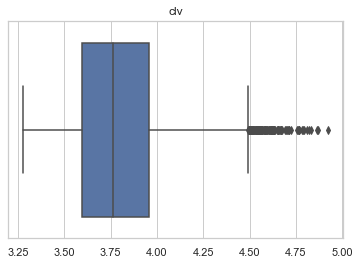

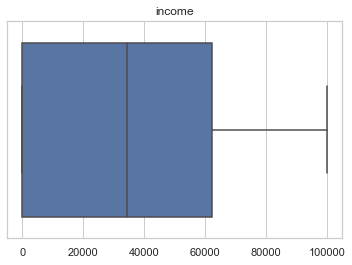

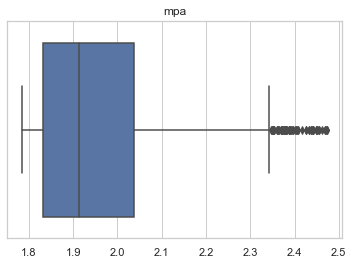

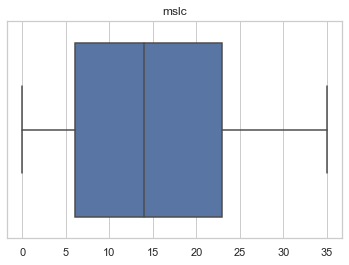

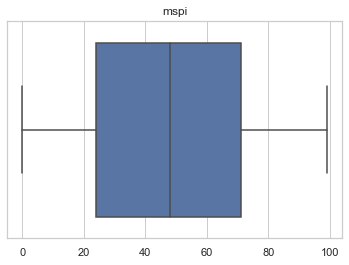

The variable clv has 125 outliers.
The variable income does not have upper outliers.
The variable mpa has 77 outliers.
The variable mslc does not have upper outliers.
The variable mspi does not have upper outliers.


/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_57797/2949505314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[feat] = df_cat[feat].map(mappers_dic[feat])
/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_57797/2949505314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [328]:
X_train2, X_test2, y_train2, y_test2 = processData(X,y, mappers, dropped_categories, add_feat=effective_month)

In [329]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   clv                         6659 non-null   float64
 1   income                      6659 non-null   float64
 2   mpa                         6659 non-null   float64
 3   mslc                        6659 non-null   float64
 4   mspi                        6659 non-null   float64
 5   coverage                    6659 non-null   float64
 6   education                   6659 non-null   float64
 7   e_status                    6659 non-null   float64
 8   loc_code                    6659 non-null   float64
 9   noc                         6659 non-null   float64
 10  n_policies                  6659 non-null   float64
 11  vehicle_size                6659 non-null   float64
 12  state_California            6659 non-null   float64
 13  state_Nevada                6659 

In [326]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clv                          6659 non-null   float64
 1   income                       6659 non-null   float64
 2   mpa                          6659 non-null   float64
 3   mslc                         6659 non-null   float64
 4   mspi                         6659 non-null   float64
 5   coverage                     6659 non-null   float64
 6   education                    6659 non-null   float64
 7   e_status                     6659 non-null   float64
 8   loc_code                     6659 non-null   float64
 9   noc                          6659 non-null   float64
 10  n_policies                   6659 non-null   float64
 11  vehicle_size                 6659 non-null   float64
 12  state_Arizona                6659 non-null   float64
 13  state_Nevada      

In [331]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   clv                         2284 non-null   float64
 1   income                      2284 non-null   float64
 2   mpa                         2284 non-null   float64
 3   mslc                        2284 non-null   float64
 4   mspi                        2284 non-null   float64
 5   coverage                    2284 non-null   float64
 6   education                   2284 non-null   float64
 7   e_status                    2284 non-null   float64
 8   loc_code                    2284 non-null   float64
 9   noc                         2284 non-null   float64
 10  n_policies                  2284 non-null   float64
 11  vehicle_size                2284 non-null   float64
 12  state_California            2284 non-null   float64
 13  state_Nevada                2284 

In [332]:
X_test2.describe()

,clv,income,mpa,mslc,mspi,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,m_status_Married,m_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,rot_Offer2,rot_Offer3,rot_Offer4,channel_Branch,channel_Call Center,channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,e2d
count,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.00000,2284.000000,2284.000000,2284.000000,2284.000000
mean,0.300323,0.375451,0.112128,0.437539,0.483047,0.245841,0.406743,0.684982,0.498249,0.078021,0.245074,0.454247,0.345447,0.103327,0.286778,0.073993,0.482925,0.586690,0.267513,0.064799,0.109457,0.132662,0.232487,0.373905,0.004816,0.022329,0.014886,0.327058,0.149737,0.112084,0.271454,0.206655,0.147110,0.014886,0.02014,0.200963,0.056042,0.189580,0.459720
std,0.218434,0.304466,0.223516,0.287341,0.281525,0.328064,0.327681,0.431255,0.304005,0.181753,0.297668,0.269219,0.475618,0.304453,0.452356,0.261817,0.499818,0.492535,0.442759,0.246224,0.312280,0.339283,0.422510,0.483945,0.069246,0.147784,0.121124,0.469241,0.356892,0.315539,0.444807,0.404994,0.354293,0.121124,0.14051,0.400808,0.230053,0.392054,0.498484
min,-0.102756,0.000000,-0.167031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.153268,0.000000,-0.075969,0.200131,0.240582,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.267974,0.332580,0.086776,0.400261,0.481164,0.000000,0.333333,1.000000,0.500000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.419574,0.624593,0.261906,0.657572,0.711722,0.500000,0.666667,1.000000,0.500000,0.000000,0.375000,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,1.048550,0.998939,1.005093,1.000653,0.992401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [333]:
X_test.describe()

,clv,income,mpa,mslc,mspi,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car,e2d
count,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.00000,2284.000000,2284.000000,2284.000000
mean,0.300323,0.375451,0.112128,0.437539,0.483047,0.245841,0.406743,0.684982,0.498249,0.078021,0.245074,0.454247,0.190455,0.103327,0.345447,0.286778,0.482925,0.267513,0.145797,0.373905,0.064799,0.132662,0.022329,0.044658,0.232487,0.004816,0.014886,0.149737,0.327058,0.112084,0.206655,0.147110,0.271454,0.518389,0.200963,0.02014,0.056042,0.014886,0.459720
std,0.218434,0.304466,0.223516,0.287341,0.281525,0.328064,0.327681,0.431255,0.304005,0.181753,0.297668,0.269219,0.392746,0.304453,0.475618,0.452356,0.499818,0.442759,0.352980,0.483945,0.246224,0.339283,0.147784,0.206598,0.422510,0.069246,0.121124,0.356892,0.469241,0.315539,0.404994,0.354293,0.444807,0.499771,0.400808,0.14051,0.230053,0.121124,0.498484
min,-0.102756,0.000000,-0.167031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.153268,0.000000,-0.075969,0.200131,0.240582,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.267974,0.332580,0.086776,0.400261,0.481164,0.000000,0.333333,1.000000,0.500000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.419574,0.624593,0.261906,0.657572,0.711722,0.500000,0.666667,1.000000,0.500000,0.000000,0.375000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,1.048550,0.998939,1.005093,1.000653,0.992401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


# Try linear regression

## Create and fit regressor

In [339]:
# Create and fit regressor
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [340]:
# Coeficients
print(len(lm.coef_))
lm.coef_

39


array([-1.35925321e+01, -1.52812261e+02,  5.25574620e+02, -7.01798063e+00,
       -9.01295193e+00,  2.99139557e+01, -6.57392316e+01, -1.07431167e+02,
        2.29355329e+02, -1.63368860e+01,  4.20771481e+00, -7.49202711e+01,
       -7.04740215e+00, -7.17801144e+00, -2.31598821e+00, -7.33076796e+00,
        3.01301044e+01,  8.36442548e+01,  1.76126466e+01,  3.15111274e+00,
        5.07047861e+00,  7.31044591e+00,  1.49320861e+00,  1.16963012e+01,
        4.59128233e+00,  5.49358322e+01,  1.11380725e+01,  4.14276646e+00,
        2.07201885e+01,  7.59487574e+00, -2.51892901e+00, -4.97416409e-01,
        2.16393099e-01, -2.86862279e+00,  2.89613203e+01,  2.35252455e+02,
        1.26863629e+01,  3.08708313e+02,  4.56631237e+00])

## Predictions

In [341]:
# Predictions
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [342]:
# Score train
lm.score(X_train,y_train)

0.5952306718815481

In [343]:
# Score test
lm.score(X_test, y_test)

0.4767177969474079

## Evaluate Metrics

In [345]:
# R2 train
r2_score(y_train, y_train_pred)

0.5952306718815481

In [389]:
# R2 test
lmScore = r2_score(y_test, y_test_pred)
lmScore

0.4767177969474079

## Plot residuals

In [351]:
max_train = max(y_train.max(), y_train_pred.max())
max_test = max(y_test.max(), y_test_pred.max())

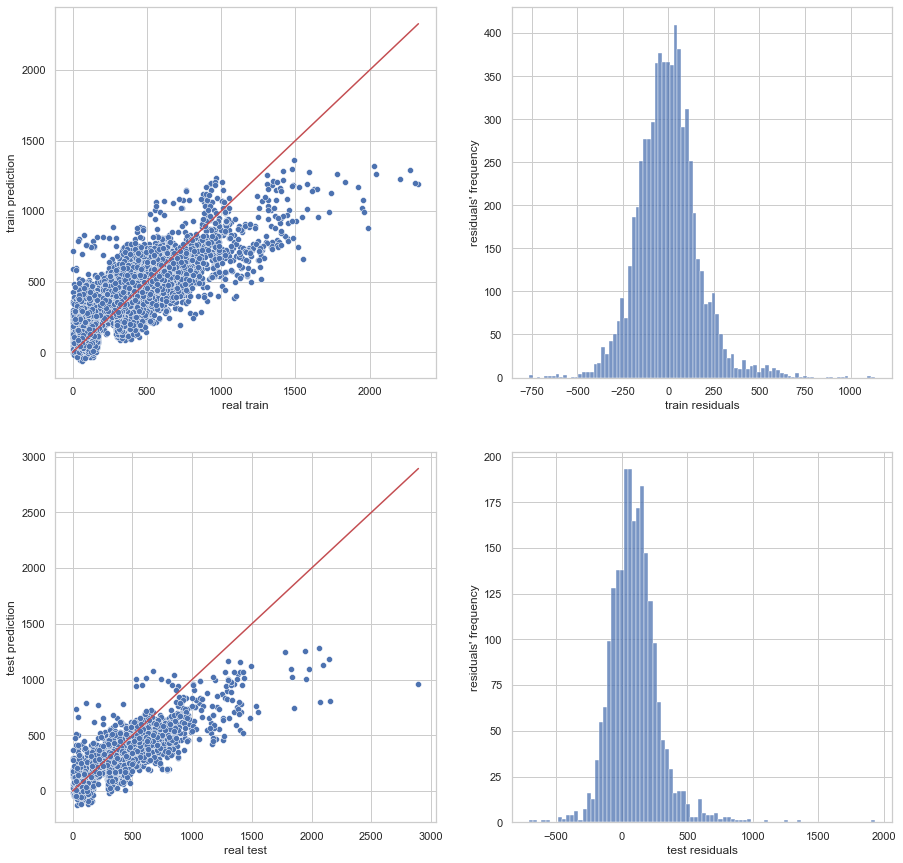

In [366]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(y=y_train_pred, x= y_train, ax = ax[0,0])
ax[0,0].set_xlabel('real train')
ax[0,0].set_ylabel('train prediction')
ax[0,0].plot([0,max_train],[0,max_train], c='r')
sns.histplot(x=y_train - y_train_pred, ax = ax[0,1], kde=False)
ax[0,1].set_xlabel('train residuals')
ax[0,1].set_ylabel("residuals' frequency")
sns.scatterplot(y=y_test_pred, x = y_test, ax = ax[1,0])
ax[1,0].set_xlabel('real test')
ax[1,0].set_ylabel('test prediction')
ax[1,0].plot([0,max_test],[0,max_test], c='r')
sns.histplot(x=y_test - y_test_pred, ax = ax[1,1])
ax[1,1].set_xlabel('test residuals')
ax[1,1].set_ylabel('residuals\' frequency')
plt.show()

In [408]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

In [364]:
residuals_test.describe()

count    2284.000000
mean       98.627606
std       188.510987
min      -707.172265
25%       -16.981377
50%        84.812178
75%       191.395146
max      1932.509672
Name: tca, dtype: float64

In [365]:
residuals_train.describe()

count    6.659000e+03
mean     4.017197e-14
std      1.696799e+02
min     -7.644112e+02
25%     -1.059411e+02
50%     -4.525553e+00
75%      9.071139e+01
max      1.134197e+03
Name: tca, dtype: float64

## plotResiduals function

In [400]:
def plotResiduals(y_train, y_test, y_train_pred, y_test_pred, lm=True):
    """Plot the residuals of a regressor"""
    
    max_train = max(y_train.max(), y_train_pred.max())
    max_test = max(y_test.max(), y_test_pred.max())
    
    fig, ax = plt.subplots(2,2, figsize=(15,15))
    sns.scatterplot(y=y_train_pred, x= y_train, ax = ax[0,0])
    ax[0,0].set_xlabel('real train')
    ax[0,0].set_ylabel('train prediction')
    if lm:
        ax[0,0].plot([0,max_train],[0,max_train], c='r')
    sns.histplot(x=y_train - y_train_pred, ax = ax[0,1], kde=False)
    ax[0,1].set_xlabel('train residuals')
    ax[0,1].set_ylabel("residuals' frequency")
    sns.scatterplot(y=y_test_pred, x = y_test, ax = ax[1,0])
    ax[1,0].set_xlabel('real test')
    ax[1,0].set_ylabel('test prediction')
    if lm:
        ax[1,0].plot([0,max_test],[0,max_test], c='r')
    sns.histplot(x=y_test - y_test_pred, ax = ax[1,1])
    ax[1,1].set_xlabel('test residuals')
    ax[1,1].set_ylabel('residuals\' frequency')
    plt.show()
    

# KNNTuner function

Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


In [ ]:
# Code Bolck

In [ ]:
models = {'k':[],'distance':[], 'p':[], 'model':[], 'score':[]}

for k in range(2,15):
    for distance in ['uniform','distance']:
        for p in range(1,4):
            model = KNeighborsRegressor(n_neighbors=k, weights=distance, p=p)
            print("Training the k-NN model with {} neihgbours, {} distance and {} p...".format(k,distance,p))
            model.fit(X_train,y_train)
            scr = model.score(X_test,y_test)
            models['k'].append(k)
            models['distance'].append(distance)
            models['p'].append(p)
            models['model'].append(model)
            models['score'].append(scr)
            print("The R2 of the k-nn model with {} neighbours {} distance and {} p on the TEST set was: {:.2f}".format(k,distance,p,scr))

models_df = pd.DataFrame(models)
models_df

In [ ]:
# Predefine the parameters
k_range = range(2,15)
distance_range = ['uniform','distance']
p_range = range(1,4)

## The function

In [371]:
def KNNRegressorTuner(X_train, X_test, y_train, y_test):
    """This function tunes the KNNRegressor"""
    
    models = {'k':[],'distance':[], 'p':[], 'model':[], 'train_score':[], 'test_score':[], 'trade-off':[]}
    
    k_range = range(2,15)
    distance_range = ['uniform','distance']
    p_range = range(1,4)
    
    for k in k_range:
        for distance in distance_range:
            for p in p_range:
                model = KNeighborsRegressor(n_neighbors=k, weights=distance, p=p)
                #print("Training the k-NN model with {} neihgbours, {} distance and {} p...".format(k,distance,p))
                model.fit(X_train,y_train)
                train_score = model.score(X_train, y_train)
                test_score = model.score(X_test,y_test)
                models['k'].append(k)
                models['distance'].append(distance)
                models['p'].append(p)
                models['model'].append(model)
                models['train_score'].append(train_score)
                models['test_score'].append(test_score)
                models['trade_off'].append(test_score-train_score)
                #print("The R2 of the k-nn model with {} neighbours {} distance and {} p on the TEST set was: {:.2f}".format(k,distance,p,scr))

    models_df = pd.DataFrame(models) #.sort_values('score', ascending=False, inplace=True)
    # models_df.head()
    
    return models_df
    

In [372]:
models_df = KNNRegressorTuner(X_train, X_test, y_train, y_test)

In [373]:
models_df.head()

,k,distance,p,model,train_score,test_score,trade-off
0,2,uniform,1,"KNeighborsRegressor(n_neighbors=2, p=1)",0.809689,0.405140,-0.404549
1,2,uniform,2,KNeighborsRegressor(n_neighbors=2),0.764326,0.313436,-0.450890
2,2,uniform,3,"KNeighborsRegressor(n_neighbors=2, p=3)",0.744448,0.239854,-0.504594
3,2,distance,1,"KNeighborsRegressor(n_neighbors=2, p=1, weight...",1.000000,0.412355,-0.587645
4,2,distance,2,"KNeighborsRegressor(n_neighbors=2, weights='di...",1.000000,0.322013,-0.677987


/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


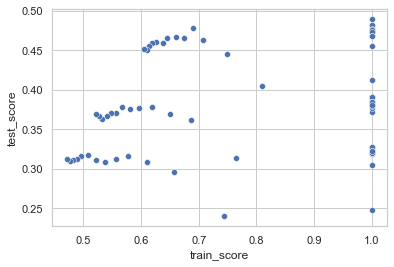

In [386]:
sns.scatterplot(models_df.train_score, models_df.test_score) # models_df['trade-off'])
plt.show()

In [ ]:
# ??? No tengo muy claro como aprovechar esto
# ??? How can be computed the variance of a model?


## elbowTest function

In [376]:
def elbowTest(X_train, X_test, y_train, y_test):
    """"""
    
    knn_models = []
    scores = []
    
    for k in range(2,15):
        regressor = KNeighborsRegressor(n_neighbors=k)
        # print("Training the k-NN model with {} neihgbours...".format(k))
        regressor.fit(X_train, y_train)
        # knn_models.append(regressor)
        scores.append(regressor.score(X_test, y_test))
        #print()
    
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
             marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.xticks(range(1,16))
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    

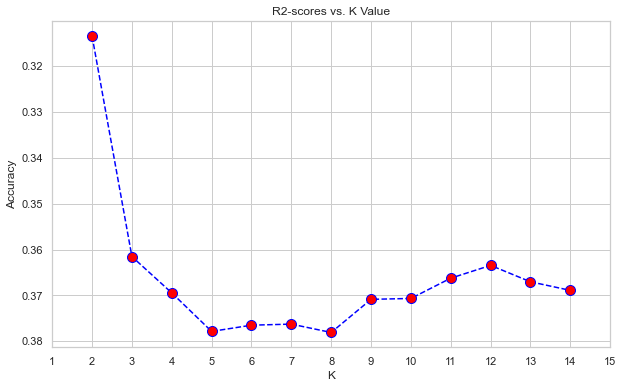

In [377]:
elbowTest(X_train, X_test, y_train, y_test)

# Check lm and knn

In [378]:
# Filter models by elbow

In [379]:
modelsK5 = models_df[models_df.k == 5]

In [ ]:
# Order by test_score

In [384]:
modelsK5.sort_values('test_score', ascending=False).head(6) #, inplace=True)

,k,distance,p,model,train_score,test_score,trade-off
21,5,distance,1,"KNeighborsRegressor(p=1, weights='distance')",1.000000,0.489854,-0.510146
18,5,uniform,1,KNeighborsRegressor(p=1),0.690687,0.477769,-0.212919
22,5,distance,2,KNeighborsRegressor(weights='distance'),1.000000,0.390409,-0.609591
19,5,uniform,2,KNeighborsRegressor(),0.618378,0.377830,-0.240549
23,5,distance,3,"KNeighborsRegressor(p=3, weights='distance')",1.000000,0.326381,-0.673619
20,5,uniform,3,KNeighborsRegressor(p=3),0.578123,0.315830,-0.262293


El 18?  
I guess model 21 is overfitted, because of its train_score = 1.  
??? trade-off < 0

In [ ]:
# ??? Está mal la presentación de clase?

In [ ]:
## knn predictions

In [388]:
model18 = modelsK5.loc[18,'model']

In [390]:
y_train_pred_knn = model18.predict(X_train)

In [391]:
y_test_pred_knn = model18.predict(X_test)

In [396]:
# Score

In [397]:
knnScore = modelsK5.loc[18,'test_score']
knnScore

0.47776865512067346

In [ ]:
## plot knn residuals

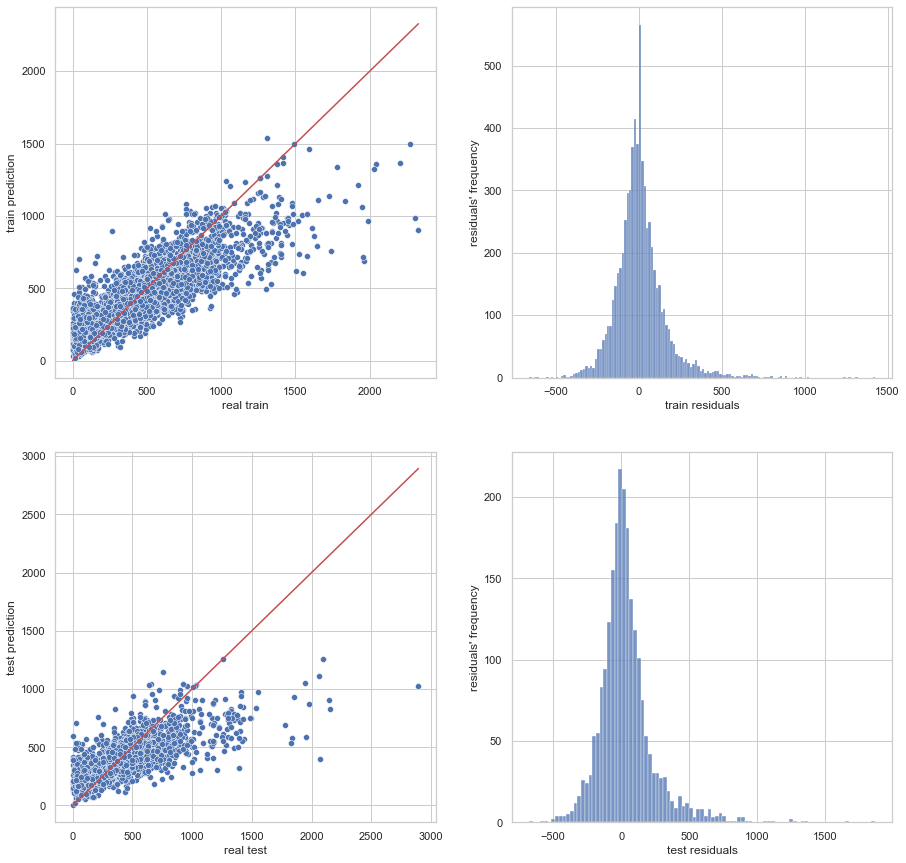

In [392]:
plotResiduals(y_train, y_test, y_train_pred_knn, y_test_pred_knn)

In [ ]:
# ??? Is it necessary to plot a line in a knnRegressor?

In [393]:
residuals_train_knn = y_train - y_train_pred_knn
residuals_test_knn = y_test - y_test_pred_knn

In [394]:
residuals_train_knn.describe()

count    6659.000000
mean        6.616186
std       148.181173
min      -662.085715
25%       -71.824707
50%        -2.394614
75%        66.528182
max      1424.260851
Name: tca, dtype: float64

In [395]:
residuals_test_knn.describe()

count    2284.000000
mean       37.827764
std       209.154450
min      -677.514603
25%       -71.407573
50%        10.573889
75%       108.548985
max      1863.389274
Name: tca, dtype: float64

In [ ]:
## Compare scores

In [398]:
knnScore > lmScore

True

## Check model21 residuals

In [401]:
model21 = modelsK5.loc[21,'model']

In [402]:
y_train_pred_21 = model21.predict(X_train)

In [403]:
y_test_pred_21 = model21.predict(X_test)

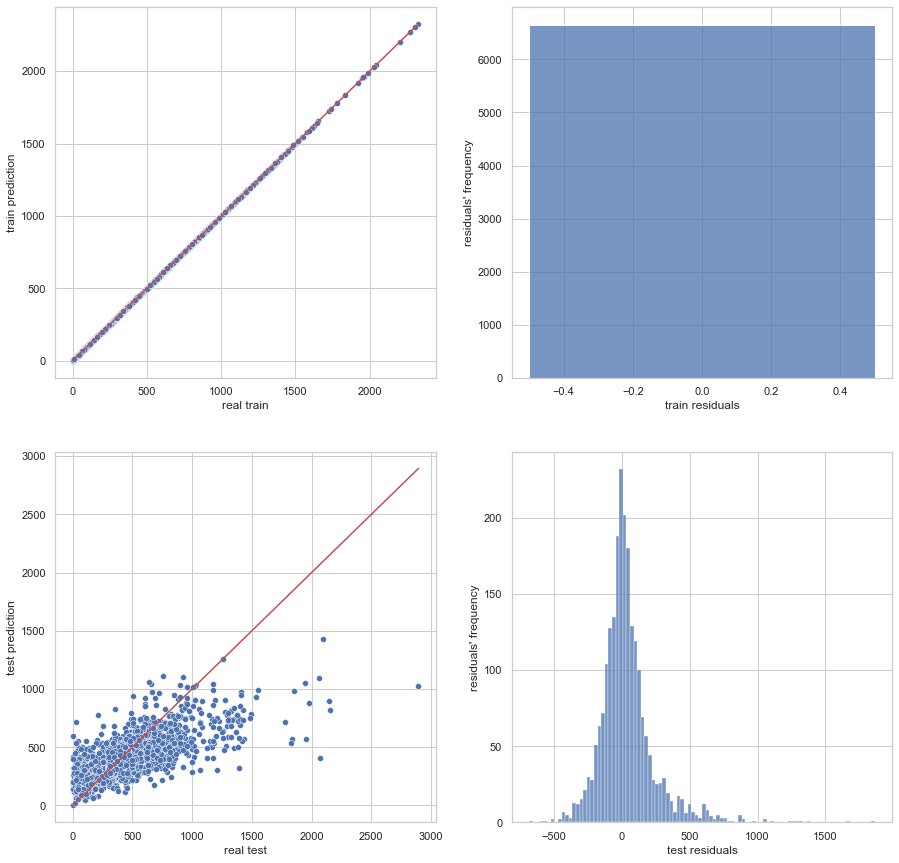

In [404]:
plotResiduals(y_train, y_test, y_train_pred_21, y_test_pred_21)

Yes, it is clearly overfitted.

In [ ]:
# ??? What's the matter with the matter with the histplot? It is not the first time I find that bug.

# Residuals_df

In [ ]:
# Check shape and indices before concat

In [407]:
print(X_train.shape)
print(residuals_train_knn.shape)

(6659, 39)
(6659,)


In [413]:
X_train.index

RangeIndex(start=0, stop=6659, step=1)

In [414]:
residuals_train_knn.index

Int64Index([7414, 5108, 7628, 2735, 5537, 8533, 4786, 8648, 7036, 1343,
            ...
            2599,  705, 3468, 6744, 5874, 4373, 7891, 4859, 3264, 2732],
           dtype='int64', length=6659)

In [415]:
X_train.index = residuals_train_knn.index
X_train.index


Int64Index([7414, 5108, 7628, 2735, 5537, 8533, 4786, 8648, 7036, 1343,
            ...
            2599,  705, 3468, 6744, 5874, 4373, 7891, 4859, 3264, 2732],
           dtype='int64', length=6659)

In [ ]:
# Concat

In [ ]:
# ??? Is this the dataframe I should concat to (X_train processed)?

In [417]:
residuals_train_df = pd.concat([X_train,residuals_train_knn], axis=1).rename(columns={'tca':'residuals'})
print(residuals_train_df.shape)
residuals_train_df.head()

(6659, 40)


,clv,income,mpa,mslc,mspi,coverage,education,e_status,loc_code,noc,n_policies,vehicle_size,state_Arizona,state_Nevada,state_California,state_Oregon,gender_M,m_status_Single,m_status_Divorced,policy_Personal L3,policy_Corporate L2,policy_Personal L1,policy_Special L2,policy_Corporate L1,policy_Personal L2,policy_Special L1,policy_Special L3,rot_Offer3,rot_Offer2,rot_Offer4,channel_Call Center,channel_Web,channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury SUV,vehicle_class_Sports Car,vehicle_class_Luxury Car,e2d,residuals
7414,0.368942,0.000000,0.201577,0.114286,0.787879,0.5,0.000000,0.0,0.5,0.0,0.375,0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,60.000000
5108,0.132118,0.792229,0.107286,0.314286,0.747475,0.0,0.666667,1.0,0.5,0.0,0.000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.404344
7628,0.171536,0.000000,0.345353,0.400000,0.575758,0.5,0.333333,0.0,0.5,0.4,0.000,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-109.203239
2735,0.730362,0.525845,0.540359,0.942857,0.282828,0.5,0.000000,1.0,0.0,0.0,0.125,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-317.288065
5537,0.634903,0.332450,0.337104,0.600000,0.818182,0.5,0.666667,1.0,1.0,0.0,0.125,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,34.365970


# Functions' summary

In [ ]:
def continuous_discrete(df,n=10):
    """divides a data frame into continuous and discrete variables
    based on n, the number of classes."""
    cont = []
    disc = []
    for c in df.columns:
        if df[c].nunique() >= n:
            cont.append(c)
        else:
            disc.append(c)
    
    continuous_df = df[cont]
    discret_df = df[disc]
    
    return continuous_df, discret_df

In [ ]:
def corrPlots(df):
    """ Plots correlation matrix, heatmap and pairplot"""
    display(df.corr())
    sns.heatmap(round(df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
    plt.show()
    sns.pairplot(df)
    plt.show()

In [ ]:
def plotDiscrete(df):
    """Countplots for a dataframe of discrete variables"""
    for c in df.columns:
        ax = sns.countplot(x=c,data=df)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        # annotate
        ax.bar_label(ax.containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
        ax.margins(y=0.1)
        
        plt.show()

In [ ]:
def plotContinuous(df):
    """Histplots for a dataframe of continuous variables"""
    for c in df.columns:
        sns.histplot(x=c,data=df, kde=True)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        plt.show()

In [ ]:
def plotOutliers(df):
    """Boxplots for a dataframe of continuous variables"""
    for c in df.columns:
        sns.set_theme(style="whitegrid")
        ax = sns.boxplot(x=c, data=df, orient='h')
        plt.title(c)
        plt.xlabel(None)
        #plt.tick_params(axis='x', labelrotation=55)
        plt.show()

In [ ]:
def logTransform(df):
    """Checks skewness higher than 2 and apply log transform on those variables"""
    skewed = df.skew()[df.skew()>2]
    if len(skewed) > 0:
        for c in skewed.index:
            df[c] = df[c].apply(lambda x: np.log10(x) if x != 0 else x)
                
    return df

In [ ]:
def countOutliers(df):
    """Counts the outliers in every column of a continuous data frame.
    Returns a data frame with the information of the outliers including its actual sub-dataframes.
    It is just done for the UPPER limit. Not yet for the lower"""
    
    out_data = {'feature':[], 'iqr':[], 'upper':[], 'n_outliers':[], 'outliers_df':[] } #'lower':[], 
    
    for c in df.columns:
        iqr = np.nanpercentile(df[c] ,75) - np.nanpercentile(df[c],25)
        
        upper_limit = np.nanpercentile(df[c],75) + 1.5*iqr
        if upper_limit < df[c].max():
            out_data['feature'].append(c)
            out_data['iqr'].append(iqr)
            out_data['upper'].append(upper_limit)
            
            outliers = df[df[c] > upper_limit]
            out_data['outliers_df'].append(outliers)
            out_data['n_outliers'].append(len(outliers))
            
            print('The variable {} has {} outliers.'.format(c,len(outliers)))
        
        else:
            # out_data['upper'].append(df[c].max())
            print('The variable {} does not have upper outliers.'.format(c))
    out_data = pd.DataFrame(out_data)
    
    return out_data


In [ ]:
def removeOutliers(X_train_continuous, X_train_categorical, y_train):
    """This function remove the outliers in the training set:
    X_train_continuous
    X_train_categorical
    y_train"""
    
    # LogTransform: check skewness in the continuous features and logTransform them
    X_train_continuous = logTransform(X_train_continuous)
    
    # Plots outliers
    plotOutliers(X_train_continuous)
    
    # Counts outliers and gets its info
    outliers_data = countOutliers(X_train_continuous)
    
    
    # Removing the outliers
    if len(outliers_data) > 0:
        # Get the indices of the outliers
        indices = pd.Index([])
        for i in outliers_data.index:
            indices = indices.append(out_data.loc[i,'outliers_df'].index)
        indices = indices.drop_duplicates()
        
        # Drop the outliers
        X_train_continuous.drop(index=indices, inplace=True)
        X_train_categorical.drop(index=indices, inplace=True)
        y_train.drop(index=indices, inplace=True)
    
    else:
        print('There was not found any outlier.')
    
    return X_train_continuous, X_train_categorical, y_train
    

In [ ]:
def normalize(df):
    """This function normalizes, std = 1, the features of a continuous df"""
    for f in df.columns:
        s = df[f].std()
        df[f] = df[f].apply(lambda x: x/s)
    return df

In [ ]:
def defOrdinals(df_cat, mappers_dic):
    """Defines as Categoricals Ordered all the features inside a mapper dictionary of mappers 
    returns a dataframe with the ordinal features transformed"""
    for feat in mappers_dic.keys():
        df_cat[feat] = df_cat[feat].map(mappers_dic[feat])
        df_cat[feat] = pd.Categorical(df_cat[feat], ordered = True)
    
    return df_cat

In [ ]:
def defineOrdinal(df, feat, mapper):
    """Defines a feature as a Categorical Ordered
    returns a series"""
    df[feat] = df[feat].map(mapper)
    df[feat] = pd.Categorical(df[feat], ordered = True)
    
    return df[feat]

In [ ]:
def saveCategories(nominal_train, sample_df=categorical_df):
    """Create a list of categories to be passed to OneHotEncoder"""
    categories = []
    for c in nominal_train.columns:
        categories.append(categorical_df[c].unique())
    return categories

In [ ]:
def numericCategorical(df):
    """Split a dataframe into numeric or categorical according to the data types
    (If it is passaed after continuousDiscrete all numeric should be CONTINUOUS)"""
    
    df_numeric = df._get_numeric_data()
    df_categorical = df.select_dtypes(include=['object','category'])
    
    return df_numeric, df_categorical


In [ ]:
def encodeCategoricals(df, ord_mapper, fit=False, categories='auto'):
    """Encodes a dataframe of categorical variables
    * ord_mapper: for ordinal categories
    - Set fit to True if model OneHotEncoder not yet fitted
    - requires encoder as fitted OneHotEncoder if fit=False 
    Subfunctions:
        defOrdinals
    
    returns a dataframe of encoded categorical variables"""
    
    # Define encoder as global to avoid UnboundLocalError
    global encoder
    
    # Defines and encode ordinal variables
    df = defOrdinals(df, mappers_dic = ord_mapper)
    
    # Split Nominal and ordinals
    df_ordinal = df.select_dtypes('category')
    df_nominal = df.select_dtypes('object')
    
    #Save the indices
    indices = df_nominal.index
    
    # OneHotEncoder
    if fit: 
        # Fit
        encoder = OneHotEncoder(categories=categories, sparse=False, drop='first')
        encoder.fit(df_nominal)
    # Transform
    df_nominal_encoded = encoder.transform(df_nominal)
    df_nominal_encoded = pd.DataFrame(df_nominal_encoded, columns = encoder.get_feature_names_out())
    
    # restore indices
    df_nominal_encoded.index = indices
    
    # concat nominal and ordinal into de categorical
    df = pd.concat([df_ordinal,df_nominal_encoded], axis=1)
    
    return df


In [ ]:
def processData(X,y, ord_mapper, drop_feat, add_feat, categories = 'auto'):
    """Process data after preprocessing
    Inputs: 
        X,y
        ord_mapper: dictionary of dictionaries for the ordinal features
        drop_feat: list of features to be dropped
        add_feat: (time-like feature to be merged after logTransform and normalize)
        categories
    Sub-functions:
        numericCategorical
        removeOutliers
        logTransform
        normalize
        encodeCategoricals
    Returns: 
        X_train (without outliers) (normalized, encoded and scaled) 
        X_test (normalized, encoded and scaled)
        y_train (without outliers)
        y_test
    """
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    
    
    # Drop some features
    if len(drop_feat)>0:
        X_train.drop(columns=drop_feat, inplace=True, errors='ignore')
        X_test.drop(columns=drop_feat, inplace=True, errors='ignore')
    
    # Split X_train and X_test into continuous and categorical
    X_train_continuous, X_train_categorical = numericCategorical(X_train)
    X_test_continuous, X_test_categorical = numericCategorical(X_test)
    
    # Remove outliers from train set (reduce skewness - logTransform)
    X_train_continuous, X_train_categorical, y_train = removeOutliers(X_train_continuous, X_train_categorical, y_train)
    
    # LogTransform X_test
    X_test_continuous = logTransform(X_test_continuous)
    
    # Normalize continuos train and test
    X_train_continuous = normalize(X_train_continuous)
    X_test_continuous = normalize(X_test_continuous)
    
    
    # Encode X_train_categorical
    X_train_categorical = encodeCategoricals(X_train_categorical, ord_mapper, fit=True, categories=categories)
    # Encode X_test_categorical
    X_test_categorical = encodeCategoricals(X_test_categorical, ord_mapper)
    
    
    # Concat continuous and categorical
    X_train = pd.concat([X_train_continuous,X_train_categorical], axis=1)
    X_test = pd.concat([X_test_continuous,X_test_categorical], axis=1)
    
    # Merge Additional Features
    X_train = pd.merge(X_train, add_feat,how='left',left_index=True, right_index=True)
    X_test = pd.merge(X_test, add_feat, how='left',left_index=True, right_index=True)
    
    # MinMax Scale
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    features = scaler.get_feature_names_out()
    X_train = scaler.transform(X_train)
    X_train = pd.DataFrame(X_train, columns=features)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns = features)
    
    return X_train, X_test, y_train, y_test
    
    

In [ ]:
def plotResiduals(y_train, y_test, y_train_pred, y_test_pred, lm=True):
    """Plot the residuals of a regressor"""
    
    max_train = max(y_train.max(), y_train_pred.max())
    max_test = max(y_test.max(), y_test_pred.max())
    
    fig, ax = plt.subplots(2,2, figsize=(15,15))
    sns.scatterplot(y=y_train_pred, x= y_train, ax = ax[0,0])
    ax[0,0].set_xlabel('real train')
    ax[0,0].set_ylabel('train prediction')
    if lm:
        ax[0,0].plot([0,max_train],[0,max_train], c='r')
    sns.histplot(x=y_train - y_train_pred, ax = ax[0,1], kde=False)
    ax[0,1].set_xlabel('train residuals')
    ax[0,1].set_ylabel("residuals' frequency")
    sns.scatterplot(y=y_test_pred, x = y_test, ax = ax[1,0])
    ax[1,0].set_xlabel('real test')
    ax[1,0].set_ylabel('test prediction')
    if lm:
        ax[1,0].plot([0,max_test],[0,max_test], c='r')
    sns.histplot(x=y_test - y_test_pred, ax = ax[1,1])
    ax[1,1].set_xlabel('test residuals')
    ax[1,1].set_ylabel('residuals\' frequency')
    plt.show()
    

In [ ]:
def KNNRegressorTuner(X_train, X_test, y_train, y_test):
    """This function tunes the KNNRegressor"""
    
    models = {'k':[],'distance':[], 'p':[], 'model':[], 'train_score':[], 'test_score':[], 'trade-off':[]}
    
    k_range = range(2,15)
    distance_range = ['uniform','distance']
    p_range = range(1,4)
    
    for k in k_range:
        for distance in distance_range:
            for p in p_range:
                model = KNeighborsRegressor(n_neighbors=k, weights=distance, p=p)
                #print("Training the k-NN model with {} neihgbours, {} distance and {} p...".format(k,distance,p))
                model.fit(X_train,y_train)
                train_score = model.score(X_train, y_train)
                test_score = model.score(X_test,y_test)
                models['k'].append(k)
                models['distance'].append(distance)
                models['p'].append(p)
                models['model'].append(model)
                models['train_score'].append(train_score)
                models['test_score'].append(test_score)
                models['trade_off'].append(test_score-train_score)
                #print("The R2 of the k-nn model with {} neighbours {} distance and {} p on the TEST set was: {:.2f}".format(k,distance,p,scr))

    models_df = pd.DataFrame(models) #.sort_values('score', ascending=False, inplace=True)
    # models_df.head()
    
    return models_df
    

In [ ]:
def elbowTest(X_train, X_test, y_train, y_test):
    """"""
    
    knn_models = []
    scores = []
    
    for k in range(2,15):
        regressor = KNeighborsRegressor(n_neighbors=k)
        # print("Training the k-NN model with {} neihgbours...".format(k))
        regressor.fit(X_train, y_train)
        # knn_models.append(regressor)
        scores.append(regressor.score(X_test, y_test))
        #print()
    
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
             marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.xticks(range(1,16))
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    

# End